In [146]:
import pandas as pd
import numpy as np
from scipy.stats import skew, kurtosis

data = pd.read_excel('Data.xlsx')
csv_data = data.to_csv('salesData.csv', index=False,encoding='utf-8-sig')
df = pd.read_csv('salesData.csv')
df 


InvoiceID  CompanyRef  CurrencyRef  Number                     Date  \
0             62           1            1   26155  2022-02-06 00:00:00.000   
1             62           1            1   26155  2022-02-06 00:00:00.000   
2             64           1            1   26169  2022-03-02 00:00:00.000   
3             64           1            1   26169  2022-03-02 00:00:00.000   
4             67           1            1   26167  2022-02-22 00:00:00.000   
...          ...         ...          ...     ...                      ...   
17091       5173           1            1   13050  2025-03-11 00:00:00.000   
17092       5173           1            1   13050  2025-03-11 00:00:00.000   
17093       5173           1            1   13050  2025-03-11 00:00:00.000   
17094       5173           1            1   13050  2025-03-11 00:00:00.000   
17095       5173           1            1   13050  2025-03-11 00:00:00.000   

       CustomerRef  BrokerRef  Creator  PayerType  InvoicePrice  ...  \
0                5          1     8959          1  9.500000e+07  ...   
1                5          1     8959          1  9.500000e+07  ...   
2            18806          3     8947          1  1.750000e+10  ...   
3            18806          3     8947          1  1.750000e+10  ...   
4            13704          3     8947          1  2.000000e+07  ...   
...            ...        ...      ...        ...           ...  ...   
17091          574          1     9081          1  9.200000e+08  ...   
17092          574          1     9081          1  9.200000e+08  ...   
17093          574          1     9081          1  9.200000e+08  ...   
17094          574          1     9081          1  9.200000e+08  ...   
17095          574          1     9081          1  9.200000e+08  ...   

       ProductRef  Quantity  MajorUnitQuantity  InitialQuantity  PriceBaseFee  \
0             613       1.0                1.0              1.0  9.500000e+07   
1             613       1.0                1.0              1.0  9.500000e+07   
2             937       4.0                4.0              4.0  4.375000e+09   
3             937       4.0                4.0              4.0  4.375000e+09   
4           22545       1.0                1.0              1.0  2.000000e+07   
...           ...       ...                ...              ...           ...   
17091       48931     200.0              200.0            200.0  1.400000e+06   
17092       49314       1.0                1.0              1.0  6.200000e+08   
17093       49314       1.0                1.0              1.0  6.200000e+08   
17094       49315       1.0                1.0              1.0  2.000000e+07   
17095       49315       1.0                1.0              1.0  2.000000e+07   

                Fee         Price  DeliveryAddressRef         SalesArea  \
0      9.500000e+07  9.500000e+07                 NaN          ÿ™⁄© ŸÅÿ±Ÿàÿ¥€å   
1      9.500000e+07  9.500000e+07                 NaN          ÿ™⁄© ŸÅÿ±Ÿàÿ¥€å   
2      4.375000e+09  1.750000e+10                 NaN          ÿ™⁄© ŸÅÿ±Ÿàÿ¥€å   
3      4.375000e+09  1.750000e+10                 NaN          ÿ™⁄© ŸÅÿ±Ÿàÿ¥€å   
4      2.000000e+07  2.000000e+07               470.0          ÿ™⁄© ŸÅÿ±Ÿàÿ¥€å   
...             ...           ...                 ...               ...   
17091  1.400000e+06  2.800000e+08              1960.0  ÿÆÿØŸÖÿßÿ™ Ÿæÿ≥ ÿßÿ≤ ŸÅÿ±Ÿàÿ¥   
17092  6.200000e+08  6.200000e+08              1960.0  ÿÆÿØŸÖÿßÿ™ Ÿæÿ≥ ÿßÿ≤ ŸÅÿ±Ÿàÿ¥   
17093  6.200000e+08  6.200000e+08              1960.0  ÿÆÿØŸÖÿßÿ™ Ÿæÿ≥ ÿßÿ≤ ŸÅÿ±Ÿàÿ¥   
17094  2.000000e+07  2.000000e+07              1960.0  ÿÆÿØŸÖÿßÿ™ Ÿæÿ≥ ÿßÿ≤ ŸÅÿ±Ÿàÿ¥   
17095  2.000000e+07  2.000000e+07              1960.0  ÿÆÿØŸÖÿßÿ™ Ÿæÿ≥ ÿßÿ≤ ŸÅÿ±Ÿàÿ¥   

       RegionalDivision  
0                ÿ®ÿ±Ÿàÿ¨ÿ±ÿØ  
1                ÿ®ÿ±Ÿàÿ¨ÿ±ÿØ  
2                 ÿ™Ÿáÿ±ÿßŸÜ  
3                 ÿ™Ÿáÿ±ÿßŸÜ  
4                 ÿ™Ÿáÿ±ÿßŸÜ  
...                 ...  
17091             ÿ™Ÿá

In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17096 entries, 0 to 17095
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   InvoiceID               17096 non-null  int64  
 1   CompanyRef              17096 non-null  int64  
 2   CurrencyRef             17096 non-null  int64  
 3   Number                  17096 non-null  int64  
 4   Date                    17096 non-null  object 
 5   CustomerRef             17096 non-null  int64  
 6   BrokerRef               17096 non-null  int64  
 7   Creator                 17096 non-null  int64  
 8   PayerType               17096 non-null  int64  
 9   InvoicePrice            17096 non-null  float64
 10  InvoiceAdditionAmount   17096 non-null  float64
 11  InvoiceReductionAmount  17096 non-null  float64
 12  InvoiceNetPrice         17096 non-null  float64
 13  EffectiveNetPrice       17096 non-null  float64
 14  InvoiceStauts           17096 non-null

<div align="center" style="font-size: 30px; font-weight: bold;">
  <strong>ÿ≠ÿ∞ŸÅ ÿ≥ÿ™ŸàŸÜ Ÿáÿß€å ŸÜÿßŸÖÿ±ÿ®Ÿàÿ∑</strong>
</div>

In [148]:
columns = ['CompanyRef','CurrencyRef','EffectiveNetPrice','MajorUnitQuantity',
           'InitialQuantity','PriceBaseFee','DeliveryAddressRef']
df.drop(columns=columns,inplace=True)
df

InvoiceID  Number                     Date  CustomerRef  BrokerRef  \
0             62   26155  2022-02-06 00:00:00.000            5          1   
1             62   26155  2022-02-06 00:00:00.000            5          1   
2             64   26169  2022-03-02 00:00:00.000        18806          3   
3             64   26169  2022-03-02 00:00:00.000        18806          3   
4             67   26167  2022-02-22 00:00:00.000        13704          3   
...          ...     ...                      ...          ...        ...   
17091       5173   13050  2025-03-11 00:00:00.000          574          1   
17092       5173   13050  2025-03-11 00:00:00.000          574          1   
17093       5173   13050  2025-03-11 00:00:00.000          574          1   
17094       5173   13050  2025-03-11 00:00:00.000          574          1   
17095       5173   13050  2025-03-11 00:00:00.000          574          1   

       Creator  PayerType  InvoicePrice  InvoiceAdditionAmount  \
0         8959          1  9.500000e+07           8.550000e+06   
1         8959          1  9.500000e+07           8.550000e+06   
2         8947          1  1.750000e+10           1.575000e+09   
3         8947          1  1.750000e+10           1.575000e+09   
4         8947          1  2.000000e+07           1.800000e+06   
...        ...        ...           ...                    ...   
17091     9081          1  9.200000e+08           9.200000e+07   
17092     9081          1  9.200000e+08           9.200000e+07   
17093     9081          1  9.200000e+08           9.200000e+07   
17094     9081          1  9.200000e+08           9.200000e+07   
17095     9081          1  9.200000e+08           9.200000e+07   

       InvoiceReductionAmount  ...  CanceledDate             CreationDate  \
0                         0.0  ...           NaN  2022-02-27 16:51:59.880   
1                         0.0  ...           NaN  2022-02-27 16:51:59.880   
2                         0.0  ...           NaN  2022-03-02 08:23:02.367   
3                         0.0  ...           NaN  2022-03-02 08:23:02.367   
4                         0.0  ...           NaN  2022-03-02 08:50:21.620   
...                       ...  ...           ...                      ...   
17091                     0.0  ...           NaN  2025-03-11 09:23:08.820   
17092                     0.0  ...           NaN  2025-03-11 09:23:08.820   
17093                     0.0  ...           NaN  2025-03-11 09:23:08.820   
17094                     0.0  ...           NaN  2025-03-11 09:23:08.820   
17095                     0.0  ...           NaN  2025-03-11 09:23:08.820   

      InvoiceItemID InvoiceRef  ProductRef  Quantity           Fee  \
0               191         62         613       1.0  9.500000e+07   
1               191         62         613       1.0  9.500000e+07   
2               196         64         937       4.0  4.375000e+09   
3               196         64         937       4.0  4.375000e+09   
4               203         67       22545       1.0  2.000000e+07   
...             ...        ...         ...       ...           ...   
17091         45748       5173       48931     200.0  1.400000e+06   
17092         45749       5173       49314       1.0  6.200000e+08   
17093         45749       5173       49314       1.0  6.200000e+08   
17094         45750       5173       49315       1.0  2.000000e+07   
17095         45750       5173       49315       1.0  2.000000e+07   

              Price         SalesArea  RegionalDivision  
0      9.500000e+07          ÿ™⁄© ŸÅÿ±Ÿàÿ¥€å            ÿ®ÿ±Ÿàÿ¨ÿ±ÿØ  
1      9.500000e+07          ÿ™⁄© ŸÅÿ±Ÿàÿ¥€å            ÿ®ÿ±Ÿàÿ¨ÿ±ÿØ  
2      1.750000e+10          ÿ™⁄© ŸÅÿ±Ÿàÿ¥€å             ÿ™Ÿáÿ±ÿßŸÜ  
3      1.750000e+10          ÿ™⁄© ŸÅÿ±Ÿàÿ¥€å             ÿ™Ÿáÿ±ÿßŸÜ  
4      2.000000e+07          ÿ™⁄© ŸÅÿ±Ÿàÿ¥€å             ÿ™Ÿáÿ±ÿßŸÜ  
...             ...               ...               ...  
17091  2.800000e+08  ÿÆÿØŸÖÿßÿ™ Ÿæÿ≥ ÿßÿ≤ ŸÅÿ±Ÿàÿ¥     

In [149]:
df.isna().sum()

InvoiceID                     0
Number                        0
Date                          0
CustomerRef                   0
BrokerRef                     0
Creator                       0
PayerType                     0
InvoicePrice                  0
InvoiceAdditionAmount         0
InvoiceReductionAmount        0
InvoiceNetPrice               0
InvoiceStauts                 0
CanceledDate              16808
CreationDate                  0
InvoiceItemID                 0
InvoiceRef                    0
ProductRef                    0
Quantity                      0
Fee                           0
Price                         0
SalesArea                     0
RegionalDivision              0
dtype: int64

In [150]:
df = df[df['CanceledDate'].isna()]
df = df.drop(columns=['CanceledDate'])
df



InvoiceID  Number                     Date  CustomerRef  BrokerRef  \
0             62   26155  2022-02-06 00:00:00.000            5          1   
1             62   26155  2022-02-06 00:00:00.000            5          1   
2             64   26169  2022-03-02 00:00:00.000        18806          3   
3             64   26169  2022-03-02 00:00:00.000        18806          3   
4             67   26167  2022-02-22 00:00:00.000        13704          3   
...          ...     ...                      ...          ...        ...   
17091       5173   13050  2025-03-11 00:00:00.000          574          1   
17092       5173   13050  2025-03-11 00:00:00.000          574          1   
17093       5173   13050  2025-03-11 00:00:00.000          574          1   
17094       5173   13050  2025-03-11 00:00:00.000          574          1   
17095       5173   13050  2025-03-11 00:00:00.000          574          1   

       Creator  PayerType  InvoicePrice  InvoiceAdditionAmount  \
0         8959          1  9.500000e+07           8.550000e+06   
1         8959          1  9.500000e+07           8.550000e+06   
2         8947          1  1.750000e+10           1.575000e+09   
3         8947          1  1.750000e+10           1.575000e+09   
4         8947          1  2.000000e+07           1.800000e+06   
...        ...        ...           ...                    ...   
17091     9081          1  9.200000e+08           9.200000e+07   
17092     9081          1  9.200000e+08           9.200000e+07   
17093     9081          1  9.200000e+08           9.200000e+07   
17094     9081          1  9.200000e+08           9.200000e+07   
17095     9081          1  9.200000e+08           9.200000e+07   

       InvoiceReductionAmount  ...            InvoiceStauts  \
0                         0.0  ...  Registred by Accounting   
1                         0.0  ...  Registred by Accounting   
2                         0.0  ...  Registred by Accounting   
3                         0.0  ...  Registred by Accounting   
4                         0.0  ...  Registred by Accounting   
...                       ...  ...                      ...   
17091                     0.0  ...                 Canceled   
17092                     0.0  ...                 Canceled   
17093                     0.0  ...                 Canceled   
17094                     0.0  ...                 Canceled   
17095                     0.0  ...                 Canceled   

                  CreationDate InvoiceItemID  InvoiceRef  ProductRef  \
0      2022-02-27 16:51:59.880           191          62         613   
1      2022-02-27 16:51:59.880           191          62         613   
2      2022-03-02 08:23:02.367           196          64         937   
3      2022-03-02 08:23:02.367           196          64         937   
4      2022-03-02 08:50:21.620           203          67       22545   
...                        ...           ...         ...         ...   
17091  2025-03-11 09:23:08.820         45748        5173       48931   
17092  2025-03-11 09:23:08.820         45749        5173       49314   
17093  2025-03-11 09:23:08.820         45749        5173       49314   
17094  2025-03-11 09:23:08.820         45750        5173       49315   
17095  2025-03-11 09:23:08.820         45750        5173       49315   

       Quantity           Fee         Price         SalesArea RegionalDivision  
0           1.0  9.500000e+07  9.500000e+07          ÿ™⁄© ŸÅÿ±Ÿàÿ¥€å           ÿ®ÿ±Ÿàÿ¨ÿ±ÿØ  
1           1.0  9.500000e+07  9.500000e+07          ÿ™⁄© ŸÅÿ±Ÿàÿ¥€å           ÿ®ÿ±Ÿàÿ¨ÿ±ÿØ  
2           4.0  4.375000e+09  1.750000e+10          ÿ™⁄© ŸÅÿ±Ÿàÿ¥€å            ÿ™Ÿáÿ±ÿßŸÜ  
3           4.0  4.375000e+09  1.750000e+10          ÿ™⁄© ŸÅÿ±Ÿàÿ¥€å            ÿ™Ÿáÿ±ÿßŸÜ  
4           1.0  2.000000e+07  2.000000e+07          ÿ™⁄© ŸÅÿ±Ÿàÿ¥€å            ÿ™Ÿáÿ±ÿßŸÜ  
...         ...           ...           ...               ...              ...  
17091     200.0  1.400000e+06  2.80000

In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16808 entries, 0 to 17095
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   InvoiceID               16808 non-null  int64  
 1   Number                  16808 non-null  int64  
 2   Date                    16808 non-null  object 
 3   CustomerRef             16808 non-null  int64  
 4   BrokerRef               16808 non-null  int64  
 5   Creator                 16808 non-null  int64  
 6   PayerType               16808 non-null  int64  
 7   InvoicePrice            16808 non-null  float64
 8   InvoiceAdditionAmount   16808 non-null  float64
 9   InvoiceReductionAmount  16808 non-null  float64
 10  InvoiceNetPrice         16808 non-null  float64
 11  InvoiceStauts           16808 non-null  object 
 12  CreationDate            16808 non-null  object 
 13  InvoiceItemID           16808 non-null  int64  
 14  InvoiceRef              16808 non-null  int

In [152]:

for col in df.select_dtypes(include=['int64', 'float64']).columns:
    print(f"{col}: min={df[col].min()}, max={df[col].max()}, dtype={df[col].dtype}")

InvoiceID: min=62, max=5173, dtype=int64
Number: min=11171, max=27960, dtype=int64
CustomerRef: min=3, max=94414, dtype=int64
BrokerRef: min=1, max=15, dtype=int64
Creator: min=1, max=9081, dtype=int64
PayerType: min=1, max=3, dtype=int64
InvoicePrice: min=1600000.0, max=2079059364000.0, dtype=float64
InvoiceAdditionAmount: min=160000.0, max=207905936400.0, dtype=float64
InvoiceReductionAmount: min=0.0, max=2370000000.0, dtype=float64
InvoiceNetPrice: min=1760000.0, max=2286965300400.0, dtype=float64
InvoiceItemID: min=191, max=45750, dtype=int64
InvoiceRef: min=62, max=5173, dtype=int64
ProductRef: min=41, max=49319, dtype=int64
Quantity: min=0.7, max=17780.0, dtype=float64
Fee: min=45871.0, max=96636005000.0, dtype=float64
Price: min=312000.0, max=852000000000.0, dtype=float64


In [153]:
import numpy as np
from sklearn.preprocessing import LabelEncoder

lbe = LabelEncoder()
df['SalesAreaNumber'] = lbe.fit_transform(df['SalesArea'])
df 

InvoiceID  Number                     Date  CustomerRef  BrokerRef  \
0             62   26155  2022-02-06 00:00:00.000            5          1   
1             62   26155  2022-02-06 00:00:00.000            5          1   
2             64   26169  2022-03-02 00:00:00.000        18806          3   
3             64   26169  2022-03-02 00:00:00.000        18806          3   
4             67   26167  2022-02-22 00:00:00.000        13704          3   
...          ...     ...                      ...          ...        ...   
17091       5173   13050  2025-03-11 00:00:00.000          574          1   
17092       5173   13050  2025-03-11 00:00:00.000          574          1   
17093       5173   13050  2025-03-11 00:00:00.000          574          1   
17094       5173   13050  2025-03-11 00:00:00.000          574          1   
17095       5173   13050  2025-03-11 00:00:00.000          574          1   

       Creator  PayerType  InvoicePrice  InvoiceAdditionAmount  \
0         8959          1  9.500000e+07           8.550000e+06   
1         8959          1  9.500000e+07           8.550000e+06   
2         8947          1  1.750000e+10           1.575000e+09   
3         8947          1  1.750000e+10           1.575000e+09   
4         8947          1  2.000000e+07           1.800000e+06   
...        ...        ...           ...                    ...   
17091     9081          1  9.200000e+08           9.200000e+07   
17092     9081          1  9.200000e+08           9.200000e+07   
17093     9081          1  9.200000e+08           9.200000e+07   
17094     9081          1  9.200000e+08           9.200000e+07   
17095     9081          1  9.200000e+08           9.200000e+07   

       InvoiceReductionAmount  ...             CreationDate InvoiceItemID  \
0                         0.0  ...  2022-02-27 16:51:59.880           191   
1                         0.0  ...  2022-02-27 16:51:59.880           191   
2                         0.0  ...  2022-03-02 08:23:02.367           196   
3                         0.0  ...  2022-03-02 08:23:02.367           196   
4                         0.0  ...  2022-03-02 08:50:21.620           203   
...                       ...  ...                      ...           ...   
17091                     0.0  ...  2025-03-11 09:23:08.820         45748   
17092                     0.0  ...  2025-03-11 09:23:08.820         45749   
17093                     0.0  ...  2025-03-11 09:23:08.820         45749   
17094                     0.0  ...  2025-03-11 09:23:08.820         45750   
17095                     0.0  ...  2025-03-11 09:23:08.820         45750   

      InvoiceRef  ProductRef  Quantity           Fee         Price  \
0             62         613       1.0  9.500000e+07  9.500000e+07   
1             62         613       1.0  9.500000e+07  9.500000e+07   
2             64         937       4.0  4.375000e+09  1.750000e+10   
3             64         937       4.0  4.375000e+09  1.750000e+10   
4             67       22545       1.0  2.000000e+07  2.000000e+07   
...          ...         ...       ...           ...           ...   
17091       5173       48931     200.0  1.400000e+06  2.800000e+08   
17092       5173       49314       1.0  6.200000e+08  6.200000e+08   
17093       5173       49314       1.0  6.200000e+08  6.200000e+08   
17094       5173       49315       1.0  2.000000e+07  2.000000e+07   
17095       5173       49315       1.0  2.000000e+07  2.000000e+07   

              SalesArea  RegionalDivision SalesAreaNumber  
0              ÿ™⁄© ŸÅÿ±Ÿàÿ¥€å            ÿ®ÿ±Ÿàÿ¨ÿ±ÿØ               0  
1              ÿ™⁄© ŸÅÿ±Ÿàÿ¥€å            ÿ®ÿ±Ÿàÿ¨ÿ±ÿØ               0  
2              ÿ™⁄© ŸÅÿ±Ÿàÿ¥€å             ÿ™Ÿáÿ±ÿßŸÜ               0  
3              ÿ™⁄© ŸÅÿ±Ÿàÿ¥€å             ÿ™Ÿáÿ±ÿßŸÜ               0  
4              ÿ™⁄© ŸÅÿ±Ÿàÿ¥€å             ÿ™Ÿáÿ±ÿßŸÜ               0  
...                 ...               ...             ...  
17091  ÿÆÿØŸÖÿßÿ™ Ÿæÿ≥ ÿßÿ≤ ŸÅÿ±Ÿàÿ¥     

In [154]:
df['RegionalDivision'] = df['RegionalDivision'].str.strip()  
df['RegionalDivision'] = df['RegionalDivision'].str.replace(r'[^ÿ¢-€åa-zA-Z0-9\s]', '', regex=True)  
df

InvoiceID  Number                     Date  CustomerRef  BrokerRef  \
0             62   26155  2022-02-06 00:00:00.000            5          1   
1             62   26155  2022-02-06 00:00:00.000            5          1   
2             64   26169  2022-03-02 00:00:00.000        18806          3   
3             64   26169  2022-03-02 00:00:00.000        18806          3   
4             67   26167  2022-02-22 00:00:00.000        13704          3   
...          ...     ...                      ...          ...        ...   
17091       5173   13050  2025-03-11 00:00:00.000          574          1   
17092       5173   13050  2025-03-11 00:00:00.000          574          1   
17093       5173   13050  2025-03-11 00:00:00.000          574          1   
17094       5173   13050  2025-03-11 00:00:00.000          574          1   
17095       5173   13050  2025-03-11 00:00:00.000          574          1   

       Creator  PayerType  InvoicePrice  InvoiceAdditionAmount  \
0         8959          1  9.500000e+07           8.550000e+06   
1         8959          1  9.500000e+07           8.550000e+06   
2         8947          1  1.750000e+10           1.575000e+09   
3         8947          1  1.750000e+10           1.575000e+09   
4         8947          1  2.000000e+07           1.800000e+06   
...        ...        ...           ...                    ...   
17091     9081          1  9.200000e+08           9.200000e+07   
17092     9081          1  9.200000e+08           9.200000e+07   
17093     9081          1  9.200000e+08           9.200000e+07   
17094     9081          1  9.200000e+08           9.200000e+07   
17095     9081          1  9.200000e+08           9.200000e+07   

       InvoiceReductionAmount  ...             CreationDate InvoiceItemID  \
0                         0.0  ...  2022-02-27 16:51:59.880           191   
1                         0.0  ...  2022-02-27 16:51:59.880           191   
2                         0.0  ...  2022-03-02 08:23:02.367           196   
3                         0.0  ...  2022-03-02 08:23:02.367           196   
4                         0.0  ...  2022-03-02 08:50:21.620           203   
...                       ...  ...                      ...           ...   
17091                     0.0  ...  2025-03-11 09:23:08.820         45748   
17092                     0.0  ...  2025-03-11 09:23:08.820         45749   
17093                     0.0  ...  2025-03-11 09:23:08.820         45749   
17094                     0.0  ...  2025-03-11 09:23:08.820         45750   
17095                     0.0  ...  2025-03-11 09:23:08.820         45750   

      InvoiceRef  ProductRef  Quantity           Fee         Price  \
0             62         613       1.0  9.500000e+07  9.500000e+07   
1             62         613       1.0  9.500000e+07  9.500000e+07   
2             64         937       4.0  4.375000e+09  1.750000e+10   
3             64         937       4.0  4.375000e+09  1.750000e+10   
4             67       22545       1.0  2.000000e+07  2.000000e+07   
...          ...         ...       ...           ...           ...   
17091       5173       48931     200.0  1.400000e+06  2.800000e+08   
17092       5173       49314       1.0  6.200000e+08  6.200000e+08   
17093       5173       49314       1.0  6.200000e+08  6.200000e+08   
17094       5173       49315       1.0  2.000000e+07  2.000000e+07   
17095       5173       49315       1.0  2.000000e+07  2.000000e+07   

              SalesArea  RegionalDivision SalesAreaNumber  
0              ÿ™⁄© ŸÅÿ±Ÿàÿ¥€å            ÿ®ÿ±Ÿàÿ¨ÿ±ÿØ               0  
1              ÿ™⁄© ŸÅÿ±Ÿàÿ¥€å            ÿ®ÿ±Ÿàÿ¨ÿ±ÿØ               0  
2              ÿ™⁄© ŸÅÿ±Ÿàÿ¥€å             ÿ™Ÿáÿ±ÿßŸÜ               0  
3              ÿ™⁄© ŸÅÿ±Ÿàÿ¥€å             ÿ™Ÿáÿ±ÿßŸÜ               0  
4              ÿ™⁄© ŸÅÿ±Ÿàÿ¥€å             ÿ™Ÿáÿ±ÿßŸÜ               0  
...                 ...               ...             ...  
17091  ÿÆÿØŸÖÿßÿ™ Ÿæÿ≥ ÿßÿ≤ ŸÅÿ±Ÿàÿ¥     

In [155]:
print(df['RegionalDivision'].unique())

['ÿ®ÿ±Ÿàÿ¨ÿ±ÿØ' 'ÿ™Ÿáÿ±ÿßŸÜ' 'ŸÖÿ±€åŸàÿßŸÜ' 'ÿπŸÑ€å ÿ¢ÿ®ÿßÿØ ⁄©ÿ™ŸàŸÑ' '⁄©ÿ±ŸÖÿßŸÜ' '€åÿ≤ÿØ' 'ÿßÿ±ŸàŸÖ€åŸá' '€åÿßÿ≥Ÿàÿ¨'
 'ÿßÿµŸÅŸáÿßŸÜ' 'ÿß€åŸÑÿßŸÖ' 'ÿ®ÿßÿ®ŸÑÿ≥ÿ±' 'ŸÖÿ¥ŸáÿØ' 'ŸÇÿ≤Ÿà€åŸÜ' 'ÿ≥ŸÜŸÜÿØÿ¨' 'ÿßÿ±ÿß⁄©' '⁄©ÿ±ÿ¨'
 'ÿßÿ≥ÿ™ÿßŸÜ ⁄©ÿ±ŸÖÿßŸÜ' 'ŸÇŸÖ' 'ÿ®ŸÜÿØÿ±ÿπÿ®ÿßÿ≥' 'ÿ≥ŸÖŸÜÿßŸÜ' 'ŸáŸÖÿØÿßŸÜ' 'ÿ≤ÿßŸáÿØÿßŸÜ' '⁄©€åÿ¥' 'ŸÇÿ¥ŸÖ'
 'ŸÖÿ±ÿßÿ∫Ÿá' 'ÿ™ŸÜ⁄©ÿßÿ®ŸÜÿ¥Ÿáÿ≥Ÿàÿßÿ±' 'ÿÆŸà€å' 'ÿ±ÿ¥ÿ™' 'ÿ™ÿ®ÿ±€åÿ≤' 'ÿ≤ŸÜÿ¨ÿßŸÜ' 'ÿßÿ±ÿØÿ®€åŸÑ' '⁄ØŸÜÿ®ÿØ ⁄©ÿßŸàŸàÿ≥'
 'ÿ¥Ÿáÿ± ⁄©ÿ±ÿØ' 'ÿ¥€åÿ±ÿßÿ≤' 'ÿ®€åÿ±ÿ¨ŸÜÿØ' 'ÿ®ÿßÿ®ŸÑ' 'ÿ®ÿ¨ŸÜŸàÿ±ÿØ' 'ŸÖÿ±ŸÜÿØ' 'ÿµŸÅÿßÿØÿ¥ÿ™' 'Ÿáÿ¥ÿ™⁄Øÿ±ÿØ'
 'ÿÆÿ±ŸÖ ÿ¢ÿ®ÿßÿØ' 'ŸÇÿßÿ¶ŸÖÿ¥Ÿáÿ±' 'Ÿàÿ±ÿßŸÖ€åŸÜ' 'ÿ¥Ÿàÿ¥ ÿØÿßŸÜ€åÿßŸÑ' 'ŸÜŸàÿ±' 'ŸÖŸáÿßÿ®ÿßÿØ' 'ÿ¥Ÿáÿ±ÿ±€å'
 'ÿ¥Ÿáÿ±€åÿßÿ±' 'ÿ®ŸÜÿØÿ± ÿßŸÜÿ≤ŸÑ€å' 'ÿØŸÖÿßŸàŸÜÿØ' 'ÿ®ŸàŸÖŸáŸÜ' 'ÿØŸàÿ±ŸàÿØ' 'ÿßŸáŸàÿßÿ≤' 'ÿßÿ≥ÿ™ÿßŸÜ ÿ™Ÿáÿ±ÿßŸÜ'
 'ÿ®ŸÜÿØÿ± ŸÑŸÜ⁄ØŸá' 'ÿ¥Ÿáÿ± ŸÇÿØÿ≥' 'ÿßÿ≥ŸÑÿßŸÖÿ¥Ÿáÿ±' 'ŸÖÿ±⁄©ÿ≤€å ⁄©ÿ±ÿ¨' 'ŸÖÿ±⁄©ÿ≤€å ÿ±ÿ¥ÿ™' '⁄Øÿ±⁄ØÿßŸÜ' 'ÿ®Ÿàÿ¥Ÿáÿ±'
 '⁄©ÿ±ÿ¨ ' 'ŸÑŸÜ⁄Øÿ±ŸàÿØ' 'ÿßÿ≥ÿ™ÿßŸÜ ÿ®Ÿàÿ¥Ÿáÿ±' 'ÿ¨ÿßÿ¨ÿ±ŸàÿØ' 'ÿ≥ÿßŸàŸá' 'ÿßŸÜÿØ€åŸ

In [156]:
print(df['RegionalDivision'].value_counts())


RegionalDivision
ÿ™Ÿáÿ±ÿßŸÜ     9063
⁄©ÿ±ŸÖÿßŸÜ      815
€åÿ≤ÿØ        767
ÿßÿµŸÅŸáÿßŸÜ     595
ŸÖÿ¥ŸáÿØ       398
          ... 
ÿ¥ÿßŸáÿ±ŸàÿØ       2
ÿÆÿ±ŸÖÿØÿ±Ÿá       2
ÿØŸÑ€åÿ¨ÿßŸÜ       2
ÿ≥ÿ®ÿ≤Ÿàÿßÿ±       2
ŸÅÿ≥ÿß          2
Name: count, Length: 94, dtype: int64


In [157]:
df['RegionalDivisionNumber'] = lbe.fit_transform(df['RegionalDivision'])
df['InvoiceStatusNumber'] = lbe.fit_transform(df['InvoiceStauts'])
df

InvoiceID  Number                     Date  CustomerRef  BrokerRef  \
0             62   26155  2022-02-06 00:00:00.000            5          1   
1             62   26155  2022-02-06 00:00:00.000            5          1   
2             64   26169  2022-03-02 00:00:00.000        18806          3   
3             64   26169  2022-03-02 00:00:00.000        18806          3   
4             67   26167  2022-02-22 00:00:00.000        13704          3   
...          ...     ...                      ...          ...        ...   
17091       5173   13050  2025-03-11 00:00:00.000          574          1   
17092       5173   13050  2025-03-11 00:00:00.000          574          1   
17093       5173   13050  2025-03-11 00:00:00.000          574          1   
17094       5173   13050  2025-03-11 00:00:00.000          574          1   
17095       5173   13050  2025-03-11 00:00:00.000          574          1   

       Creator  PayerType  InvoicePrice  InvoiceAdditionAmount  \
0         8959          1  9.500000e+07           8.550000e+06   
1         8959          1  9.500000e+07           8.550000e+06   
2         8947          1  1.750000e+10           1.575000e+09   
3         8947          1  1.750000e+10           1.575000e+09   
4         8947          1  2.000000e+07           1.800000e+06   
...        ...        ...           ...                    ...   
17091     9081          1  9.200000e+08           9.200000e+07   
17092     9081          1  9.200000e+08           9.200000e+07   
17093     9081          1  9.200000e+08           9.200000e+07   
17094     9081          1  9.200000e+08           9.200000e+07   
17095     9081          1  9.200000e+08           9.200000e+07   

       InvoiceReductionAmount  ...  InvoiceRef ProductRef Quantity  \
0                         0.0  ...          62        613      1.0   
1                         0.0  ...          62        613      1.0   
2                         0.0  ...          64        937      4.0   
3                         0.0  ...          64        937      4.0   
4                         0.0  ...          67      22545      1.0   
...                       ...  ...         ...        ...      ...   
17091                     0.0  ...        5173      48931    200.0   
17092                     0.0  ...        5173      49314      1.0   
17093                     0.0  ...        5173      49314      1.0   
17094                     0.0  ...        5173      49315      1.0   
17095                     0.0  ...        5173      49315      1.0   

                Fee         Price         SalesArea  RegionalDivision  \
0      9.500000e+07  9.500000e+07          ÿ™⁄© ŸÅÿ±Ÿàÿ¥€å            ÿ®ÿ±Ÿàÿ¨ÿ±ÿØ   
1      9.500000e+07  9.500000e+07          ÿ™⁄© ŸÅÿ±Ÿàÿ¥€å            ÿ®ÿ±Ÿàÿ¨ÿ±ÿØ   
2      4.375000e+09  1.750000e+10          ÿ™⁄© ŸÅÿ±Ÿàÿ¥€å             ÿ™Ÿáÿ±ÿßŸÜ   
3      4.375000e+09  1.750000e+10          ÿ™⁄© ŸÅÿ±Ÿàÿ¥€å             ÿ™Ÿáÿ±ÿßŸÜ   
4      2.000000e+07  2.000000e+07          ÿ™⁄© ŸÅÿ±Ÿàÿ¥€å             ÿ™Ÿáÿ±ÿßŸÜ   
...             ...           ...               ...               ...   
17091  1.400000e+06  2.800000e+08  ÿÆÿØŸÖÿßÿ™ Ÿæÿ≥ ÿßÿ≤ ŸÅÿ±Ÿàÿ¥             ÿ™Ÿáÿ±ÿßŸÜ   
17092  6.200000e+08  6.200000e+08  ÿÆÿØŸÖÿßÿ™ Ÿæÿ≥ ÿßÿ≤ ŸÅÿ±Ÿàÿ¥             ÿ™Ÿáÿ±ÿßŸÜ   
17093  6.200000e+08  6.200000e+08  ÿÆÿØŸÖÿßÿ™ Ÿæÿ≥ ÿßÿ≤ ŸÅÿ±Ÿàÿ¥             ÿ™Ÿáÿ±ÿßŸÜ   
17094  2.000000e+07  2.000000e+07  ÿÆÿØŸÖÿßÿ™ Ÿæÿ≥ ÿßÿ≤ ŸÅÿ±Ÿàÿ¥             ÿ™Ÿáÿ±ÿßŸÜ   
17095  2.000000e+07  2.000000e+07  ÿÆÿØŸÖÿßÿ™ Ÿæÿ≥ ÿßÿ≤ ŸÅÿ±Ÿàÿ¥             ÿ™Ÿáÿ±ÿßŸÜ   

       SalesAreaNumber  RegionalDivisionNumber InvoiceStatusNumber  
0                    0                      18                   1  
1                    0                      18                   1  
2                    0                      29                   1  
3                    0                      29                   1  
4                    0                      29                   1  
...  

In [158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16808 entries, 0 to 17095
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   InvoiceID               16808 non-null  int64  
 1   Number                  16808 non-null  int64  
 2   Date                    16808 non-null  object 
 3   CustomerRef             16808 non-null  int64  
 4   BrokerRef               16808 non-null  int64  
 5   Creator                 16808 non-null  int64  
 6   PayerType               16808 non-null  int64  
 7   InvoicePrice            16808 non-null  float64
 8   InvoiceAdditionAmount   16808 non-null  float64
 9   InvoiceReductionAmount  16808 non-null  float64
 10  InvoiceNetPrice         16808 non-null  float64
 11  InvoiceStauts           16808 non-null  object 
 12  CreationDate            16808 non-null  object 
 13  InvoiceItemID           16808 non-null  int64  
 14  InvoiceRef              16808 non-null  int

In [159]:
date_columns = ['Date','CreationDate']
for col in date_columns:
    df[col] = pd.to_datetime(df[col], errors='coerce')





type_map = {
    np.uint8 : ['BrokerRef','PayerType','RegionalDivisionNumber','SalesAreaNumber','InvoiceStatusNumber'],
    np.uint16 : ['InvoiceID','Number','Creator','InvoiceItemID','InvoiceRef','ProductRef','Quantity'],
    np.uint32 : ['CustomerRef','InvoiceReductionAmount'],
    np.uint64 : ['InvoicePrice','InvoiceAdditionAmount','InvoiceNetPrice','Fee','Price']
}


for dtype,columns in type_map.items():
    for col in columns:
        df[col] = df[col].astype(dtype)
    
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 16808 entries, 0 to 17095
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   InvoiceID               16808 non-null  uint16        
 1   Number                  16808 non-null  uint16        
 2   Date                    16808 non-null  datetime64[ns]
 3   CustomerRef             16808 non-null  uint32        
 4   BrokerRef               16808 non-null  uint8         
 5   Creator                 16808 non-null  uint16        
 6   PayerType               16808 non-null  uint8         
 7   InvoicePrice            16808 non-null  uint64        
 8   InvoiceAdditionAmount   16808 non-null  uint64        
 9   InvoiceReductionAmount  16808 non-null  uint32        
 10  InvoiceNetPrice         16808 non-null  uint64        
 11  InvoiceStauts           16808 non-null  object        
 12  CreationDate            16808 non-null  datetime64[

In [160]:
df

InvoiceID  Number       Date  CustomerRef  BrokerRef  Creator  \
0             62   26155 2022-02-06            5          1     8959   
1             62   26155 2022-02-06            5          1     8959   
2             64   26169 2022-03-02        18806          3     8947   
3             64   26169 2022-03-02        18806          3     8947   
4             67   26167 2022-02-22        13704          3     8947   
...          ...     ...        ...          ...        ...      ...   
17091       5173   13050 2025-03-11          574          1     9081   
17092       5173   13050 2025-03-11          574          1     9081   
17093       5173   13050 2025-03-11          574          1     9081   
17094       5173   13050 2025-03-11          574          1     9081   
17095       5173   13050 2025-03-11          574          1     9081   

       PayerType  InvoicePrice  InvoiceAdditionAmount  InvoiceReductionAmount  \
0              1      95000000                8550000                       0   
1              1      95000000                8550000                       0   
2              1   17500000000             1575000000                       0   
3              1   17500000000             1575000000                       0   
4              1      20000000                1800000                       0   
...          ...           ...                    ...                     ...   
17091          1     920000000               92000000                       0   
17092          1     920000000               92000000                       0   
17093          1     920000000               92000000                       0   
17094          1     920000000               92000000                       0   
17095          1     920000000               92000000                       0   

       ...  InvoiceRef ProductRef Quantity         Fee        Price  \
0      ...          62        613        1    95000000     95000000   
1      ...          62        613        1    95000000     95000000   
2      ...          64        937        4  4375000000  17500000000   
3      ...          64        937        4  4375000000  17500000000   
4      ...          67      22545        1    20000000     20000000   
...    ...         ...        ...      ...         ...          ...   
17091  ...        5173      48931      200     1400000    280000000   
17092  ...        5173      49314        1   620000000    620000000   
17093  ...        5173      49314        1   620000000    620000000   
17094  ...        5173      49315        1    20000000     20000000   
17095  ...        5173      49315        1    20000000     20000000   

              SalesArea  RegionalDivision  SalesAreaNumber  \
0              ÿ™⁄© ŸÅÿ±Ÿàÿ¥€å            ÿ®ÿ±Ÿàÿ¨ÿ±ÿØ                0   
1              ÿ™⁄© ŸÅÿ±Ÿàÿ¥€å            ÿ®ÿ±Ÿàÿ¨ÿ±ÿØ                0   
2              ÿ™⁄© ŸÅÿ±Ÿàÿ¥€å             ÿ™Ÿáÿ±ÿßŸÜ                0   
3              ÿ™⁄© ŸÅÿ±Ÿàÿ¥€å             ÿ™Ÿáÿ±ÿßŸÜ                0   
4              ÿ™⁄© ŸÅÿ±Ÿàÿ¥€å             ÿ™Ÿáÿ±ÿßŸÜ                0   
...                 ...               ...              ...   
17091  ÿÆÿØŸÖÿßÿ™ Ÿæÿ≥ ÿßÿ≤ ŸÅÿ±Ÿàÿ¥             ÿ™Ÿáÿ±ÿßŸÜ                1   
17092  ÿÆÿØŸÖÿßÿ™ Ÿæÿ≥ ÿßÿ≤ ŸÅÿ±Ÿàÿ¥             ÿ™Ÿáÿ±ÿßŸÜ                1   
17093  ÿÆÿØŸÖÿßÿ™ Ÿæÿ≥ ÿßÿ≤ ŸÅÿ±Ÿàÿ¥             ÿ™Ÿáÿ±ÿßŸÜ                1   
17094  ÿÆÿØŸÖÿßÿ™ Ÿæÿ≥ ÿßÿ≤ ŸÅÿ±Ÿàÿ¥             ÿ™Ÿáÿ±ÿßŸÜ                1   
17095  ÿÆÿØŸÖÿßÿ™ Ÿæÿ≥ ÿßÿ≤ ŸÅÿ±Ÿàÿ¥             ÿ™Ÿáÿ±ÿßŸÜ                1   

       RegionalDivisionNumber InvoiceStatusNumber  
0                          18                   1  
1                          18                   1  
2                          29                   1  
3                          29                   1  
4                          29                   1  
...                       ...                 ...  
17091                      29                   0  
170

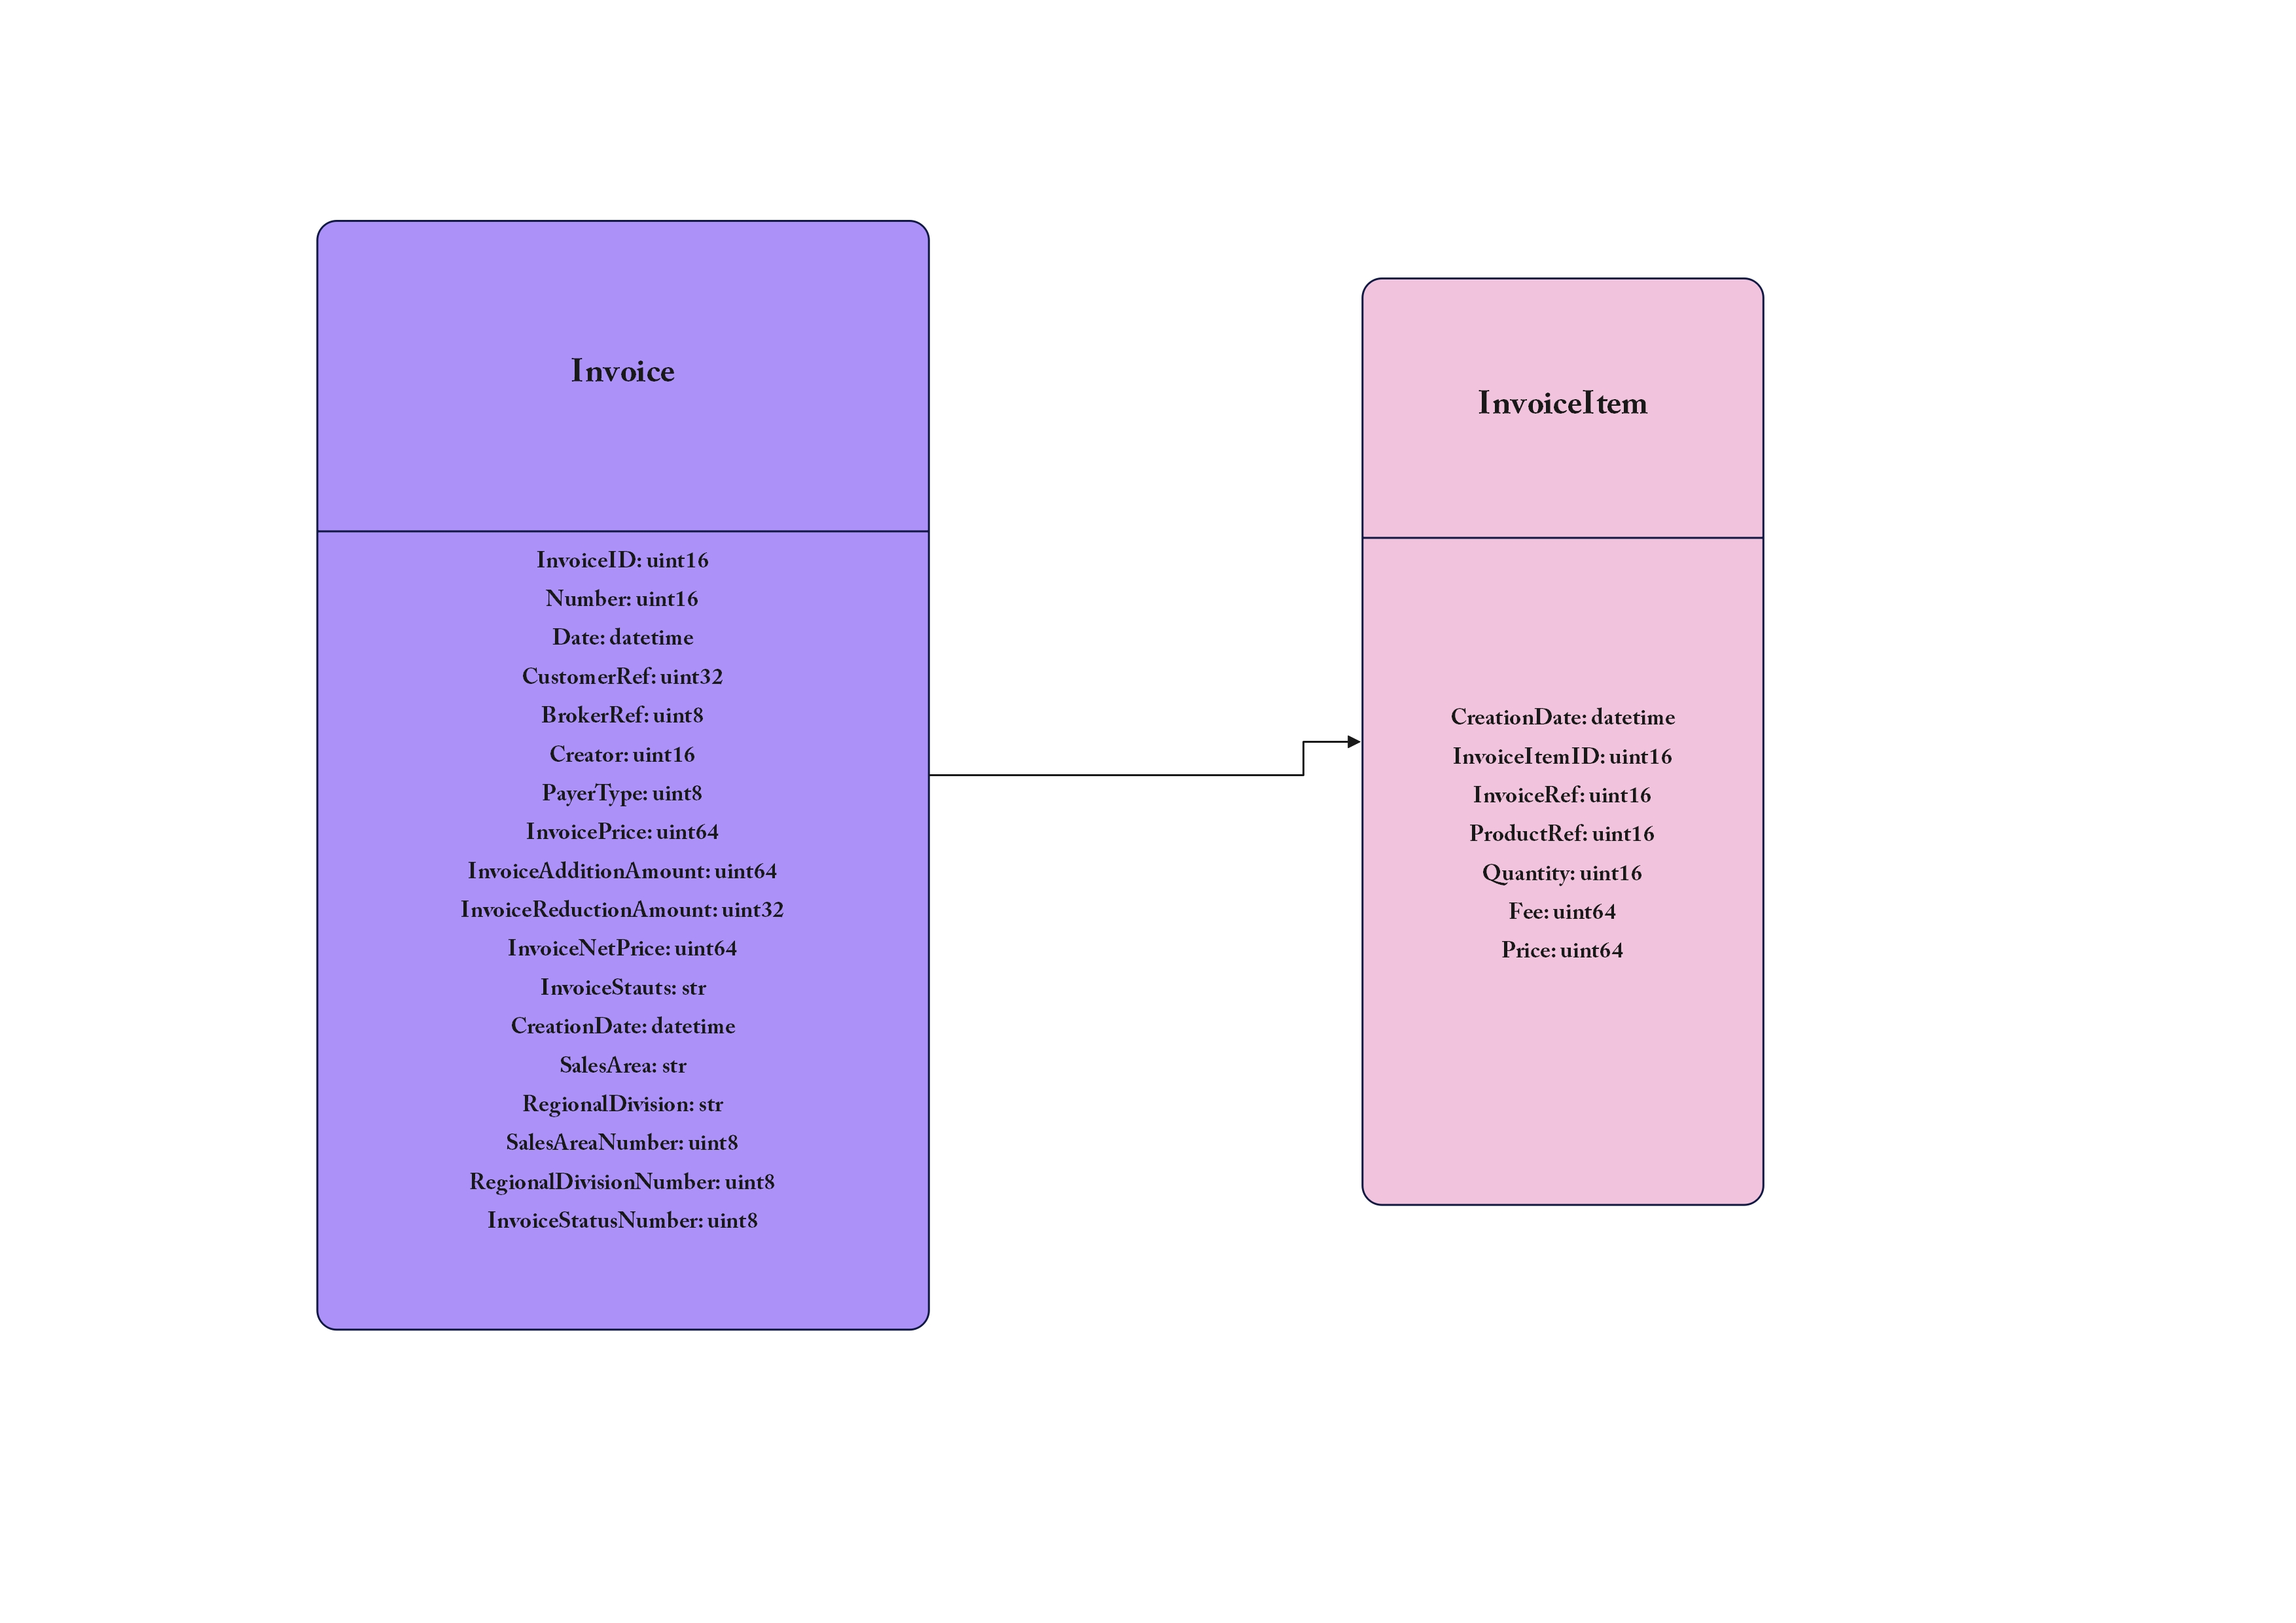

In [161]:
from IPython.display import Image
Image(filename='UML.jpg')


<div align="center" style="font-size: 30px; font-weight: bold;">
  <strong>ÿ™ÿ®ÿØ€åŸÑ ŸÅÿß⁄©ÿ™Ÿàÿ± Ÿà ÿßŸÇŸÑÿßŸÖ ÿ¢ŸÜ ÿ®Ÿá ÿØ€åÿ™ÿßŸÅÿ±€åŸÖ Ÿáÿß€å ÿ¨ÿØÿß⁄ØÿßŸÜŸá</strong>
</div>

In [162]:
invoice_columns = [
    'InvoiceID',
    'Number',
    'Date',
    'CustomerRef',
    'BrokerRef',
    'Creator',
    'PayerType',
    'InvoicePrice',
    'InvoiceAdditionAmount',
    'InvoiceReductionAmount',
    'InvoiceNetPrice',
    'InvoiceStauts',
    'CreationDate',
    'SalesArea',
    'RegionalDivision',
    'SalesAreaNumber',
    'RegionalDivisionNumber',
    'InvoiceStatusNumber'
]

df_invoice = df[invoice_columns].drop_duplicates(subset='InvoiceID')

invoice_item_columns = [
    'InvoiceItemID',
    'InvoiceRef',   
    'ProductRef',
    'Quantity',
    'Fee',
    'Price',
    'CreationDate'
]

df_invoice_items = df[invoice_item_columns]

print(df_invoice,df_invoice_items)





       InvoiceID  Number       Date  CustomerRef  BrokerRef  Creator  \
0             62   26155 2022-02-06            5          1     8959   
2             64   26169 2022-03-02        18806          3     8947   
4             67   26167 2022-02-22        13704          3     8947   
8             74   26170 2022-03-02          128          4     8974   
18            75   26171 2022-03-05           21          1     8959   
...          ...     ...        ...          ...        ...      ...   
17066       5166   27956 2025-03-17        94405         12     9012   
17072       5167   27957 2025-03-17        14277          1     8959   
17076       5168   27958 2025-03-17        15205          1     8959   
17086       5171   27960 2025-03-17        16039          4     8974   
17090       5173   13050 2025-03-11          574          1     9081   

       PayerType  InvoicePrice  InvoiceAdditionAmount  InvoiceReductionAmount  \
0              1      95000000                8550000 

In [163]:
# import seaborn as sns
# import matplotlib.pyplot as plt
# 
# numeric_cols = df.select_dtypes(include=['number']).columns
# filtered_df = df[numeric_cols].loc[:, df[numeric_cols].nunique() > 1]
# corr = filtered_df.corr()
# plt.figure(figsize=(10, 8))
# sns.heatmap(corr, annot=True, fmt=".1f", cmap='coolwarm')
# plt.title('Correlation Heatmap')
# plt.show()


<div align="center" style="font-size: 30px; font-weight: bold;">
  <strong>ÿ¨ŸÖÿπ ŸÅÿ±Ÿàÿ¥ ÿ®ÿ±ÿßÿ≥ÿßÿ≥ ŸÖÿßŸá Ÿà ÿ≥ÿßŸÑ</strong>
</div>

In [177]:
import jdatetime
import seaborn as sns
import arabic_reshaper
from bidi.algorithm import get_display
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from scipy.stats import shapiro

def reshape_fa(text):
    reshaped_text = arabic_reshaper.reshape(text)
    return get_display(reshaped_text)


def to_jalali(date):
    return jdatetime.datetime.fromgregorian(datetime=date).strftime('%Y/%m/%d')

df_invoice['Date_Jalali'] = df_invoice['Date'].apply(to_jalali)
df_invoice['Month_Jalali'] = df_invoice['Date_Jalali'].str[:7] 
df_invoice['Year_Jalali'] = df_invoice['Date_Jalali'].str[:4]


monthly_sales = df_invoice.groupby(df_invoice['Month_Jalali'])['InvoiceNetPrice'].sum()
monthly_sales = monthly_sales.reset_index()
monthly_sales.columns = ['Month', 'TotalSales']
monthly_sales = monthly_sales.sort_values('Month')
print('ÿ¨ŸÖÿπ ŸÅÿ±Ÿàÿ¥ Ÿáÿ± ŸÖÿßŸá:')
print(monthly_sales)
monthly_sales.to_excel('monthly_sales_jalali.xlsx', index=False)


print('*' * 50)

stat, p = shapiro(monthly_sales['TotalSales'].values)
print(f'Shapiro-Wilk Test: Statistics={stat}, p={p}')
if p > 0.05:
    print("ÿ™Ÿàÿ≤€åÿπ ŸÜÿ±ŸÖÿßŸÑ ÿßÿ≥ÿ™")
else:
    print("ÿ™Ÿàÿ≤€åÿπ ŸÜÿ±ŸÖÿßŸÑ ŸÜ€åÿ≥ÿ™")


print('*' * 50)

annual_sales = df_invoice.groupby(df_invoice['Year_Jalali'])['InvoiceNetPrice'].sum()
annual_sales = annual_sales.reset_index()
annual_sales.columns = ['Year', 'TotalSales']
print('ÿ¨ŸÖÿπ ŸÅÿ±Ÿàÿ¥ Ÿáÿ± ÿ≥ÿßŸÑ:')
print(annual_sales)

monthly_sales.to_excel('annual_sales_jalali.xlsx', index=False)







ÿ¨ŸÖÿπ ŸÅÿ±Ÿàÿ¥ Ÿáÿ± ŸÖÿßŸá:
      Month     TotalSales
0   1400/11    86418906000
1   1400/12   472676562967
2   1401/01   221527146848
3   1401/02   374716276719
4   1401/03   345000914000
5   1401/04   338374128200
6   1401/05   112800688300
7   1401/06    98994799073
8   1401/07   198882032200
9   1401/08    48567747659
10  1401/09   126492533761
11  1401/10   156953692156
12  1401/11   596768100649
13  1401/12   257529377647
14  1402/01     1674240000
15  1402/02   193653504590
16  1402/03   186435350071
17  1402/04   343139695774
18  1402/05   213725790630
19  1402/06   215402698950
20  1402/07   160253854650
21  1402/08   430993103094
22  1402/09   137056933213
23  1402/10   217959322121
24  1402/11   176349551323
25  1402/12  1491351024819
26  1403/01    33694320000
27  1403/02    58872980720
28  1403/03   161987590483
29  1403/04   528282479570
30  1403/05   114551054188
31  1403/06   388146024505
32  1403/07  2861938031805
33  1403/08   928059379391
34  1403/09    56566986324

<div align="center" style="font-size: 30px; font-weight: bold;">
  <strong>ŸÜŸÖŸàÿØÿßÿ± ŸÅÿ±Ÿàÿ¥ ⁄©ŸÑ€å ÿØÿ± Ÿáÿ± ÿ≥ÿßŸÑ ÿ®ÿ± ÿßÿ≥ÿßÿ≥ ŸÖÿßŸá</strong>
</div>

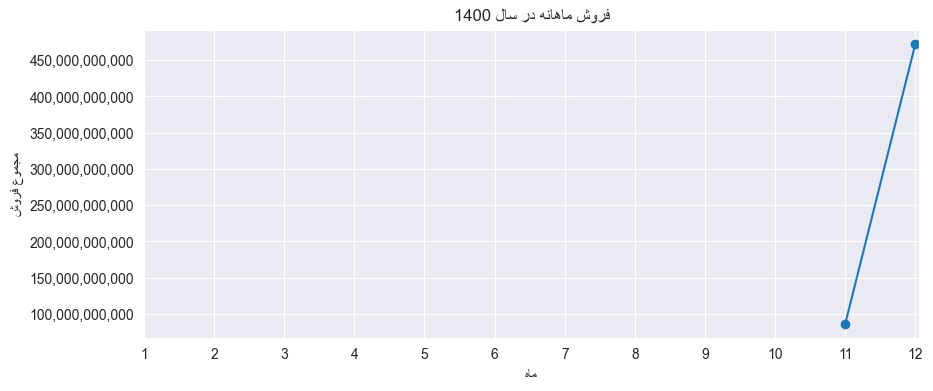

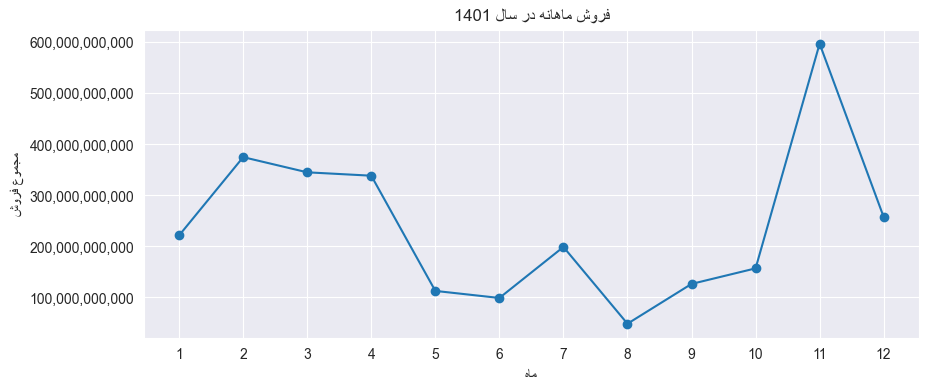

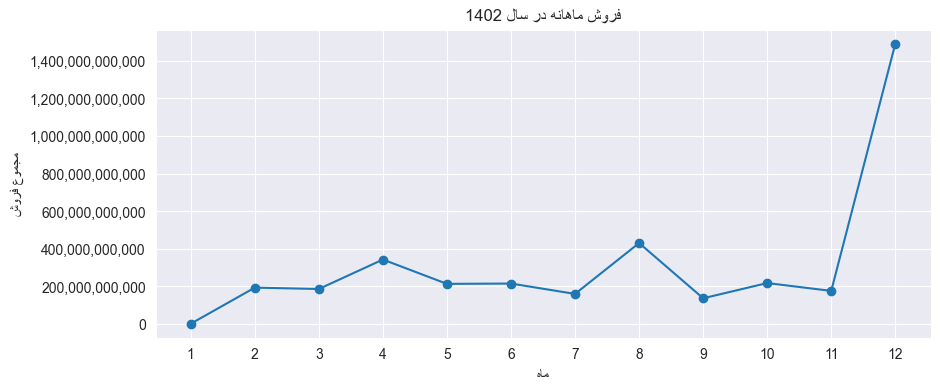

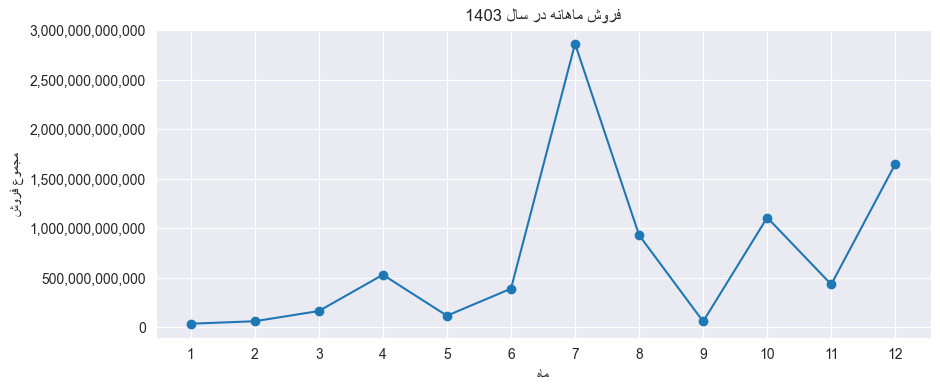

In [165]:
df_invoice['Month_Jalali_Num'] = df_invoice['Date_Jalali'].str[5:7].astype(int)
monthly_yearly_sales = df_invoice.groupby(['Year_Jalali', 'Month_Jalali_Num'])['InvoiceNetPrice'].sum().reset_index()


years = monthly_yearly_sales['Year_Jalali'].unique()

for year in years:
    yearly_data = monthly_yearly_sales[monthly_yearly_sales['Year_Jalali'] == year]
    yearly_data = yearly_data.sort_values('Month_Jalali_Num')
    
 
    yearly_data_plot = yearly_data.set_index('Month_Jalali_Num')
    
    ax = yearly_data_plot['InvoiceNetPrice'].plot(kind='line', marker='o', figsize=(10, 4))
    plt.title(reshape_fa(f'ŸÅÿ±Ÿàÿ¥ ŸÖÿßŸáÿßŸÜŸá ÿØÿ± ÿ≥ÿßŸÑ {year}'))
    plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))
    ax.set_xlabel(reshape_fa('ŸÖÿßŸá'))
    ax.set_ylabel(reshape_fa('ŸÖÿ¨ŸÖŸàÿπ ŸÅÿ±Ÿàÿ¥'))
    ax.set_xticks(range(1, 13))
    ax.grid(True)
    plt.show()


In [192]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

grouped = df_invoice.groupby(['Year_Jalali', 'SalesArea', 'Month_Jalali_Num'])['InvoiceNetPrice'].sum().reset_index()
grouped.columns = ['Year', 'SalesArea', 'Month', 'TotalSales']

years = grouped['Year'].unique()
sales_areas = grouped['SalesArea'].unique()


# 
# # ŸÖÿ±ÿ≠ŸÑŸá 2: ÿ≠ŸÑŸÇŸá ÿ®ÿ±ÿß€å Ÿáÿ± ÿ≠Ÿàÿ≤Ÿá ŸÅÿ±Ÿàÿ¥
# for area in sales_areas:
#     data_area = grouped[grouped['SalesArea'] == area].sort_values('Month')
# 
#     if data_area['Month'].nunique() < 12:
#         print(f'‚ùå ÿØÿßÿØŸá ⁄©ÿßŸÅ€å ÿ®ÿ±ÿß€å Ÿæ€åÿ¥‚Äåÿ®€åŸÜ€å ÿ≠Ÿàÿ≤Ÿá "{area}" Ÿàÿ¨ŸàÿØ ŸÜÿØÿßÿ±ÿØ.')
#         continue
# 
#     monthly_avg = data_area.set_index('Month')['TotalSales']
# 
#     # ŸÖÿØŸÑ SARIMA
#     model = SARIMAX(monthly_avg, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
#     results = model.fit(disp=False)
# 
#     forecast = results.get_forecast(steps=12)
#     predicted = forecast.predicted_mean
#     conf_int = forecast.conf_int()
# 
#     # ÿ™ÿ±ÿ≥€åŸÖ ŸÜŸÖŸàÿØÿßÿ±
#     plt.figure(figsize=(12, 6))
#     plt.plot(monthly_avg.index, monthly_avg.values, marker='o', label='ŸÅÿ±Ÿàÿ¥ ŸàÿßŸÇÿπ€å')
#     plt.plot(range(13, 25), predicted.values, marker='o', linestyle='--', color='orange', label='Ÿæ€åÿ¥‚Äåÿ®€åŸÜ€å €±€≤ ŸÖÿßŸá ÿ¢€åŸÜÿØŸá')
#     plt.fill_between(
#         range(13, 25),
#         conf_int.iloc[:, 0].values,
#         conf_int.iloc[:, 1].values,
#         color='orange', alpha=0.2, label='ÿ®ÿßÿ≤Ÿá ÿßÿ∑ŸÖ€åŸÜÿßŸÜ'
#     )
# 
#     plt.title(f'Ÿæ€åÿ¥‚Äåÿ®€åŸÜ€å ŸÅÿ±Ÿàÿ¥ ÿ®ÿ±ÿß€å ÿ≠Ÿàÿ≤Ÿá "{area}"', fontsize=14)
#     plt.xlabel('ŸÖÿßŸá ÿ¥ŸÖÿ≥€å (ÿπÿØÿØ€å)')
#     plt.ylabel('ŸÖ€åÿßŸÜ⁄Ø€åŸÜ ŸÅÿ±Ÿàÿ¥')
#     plt.xticks(ticks=list(range(1, 25)), labels=[*range(1, 13), *range(1, 13)])
#     plt.legend()
#     plt.grid(True)
#     plt.tight_layout()
#     plt.show()

<div align="center" style="font-size: 30px; font-weight: bold;">
  <strong>ŸÜŸÖŸàÿØÿßÿ± ŸÅÿ±Ÿàÿ¥ ŸÖÿßŸáÿßŸÜŸá ÿØÿ± Ÿáÿ± ÿ≥ÿßŸÑ ÿ®ÿ± ÿßÿ≥ÿßÿ≥ ÿ≠Ÿàÿ≤Ÿá ŸÅÿ±Ÿàÿ¥</strong>
</div>

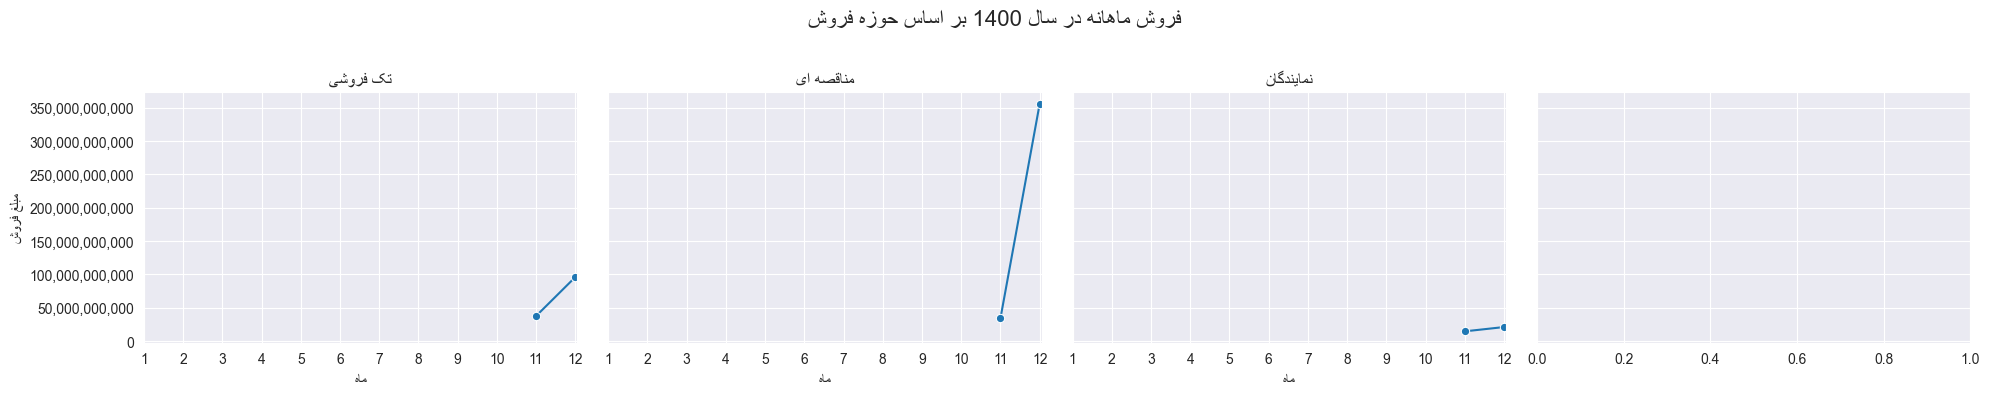

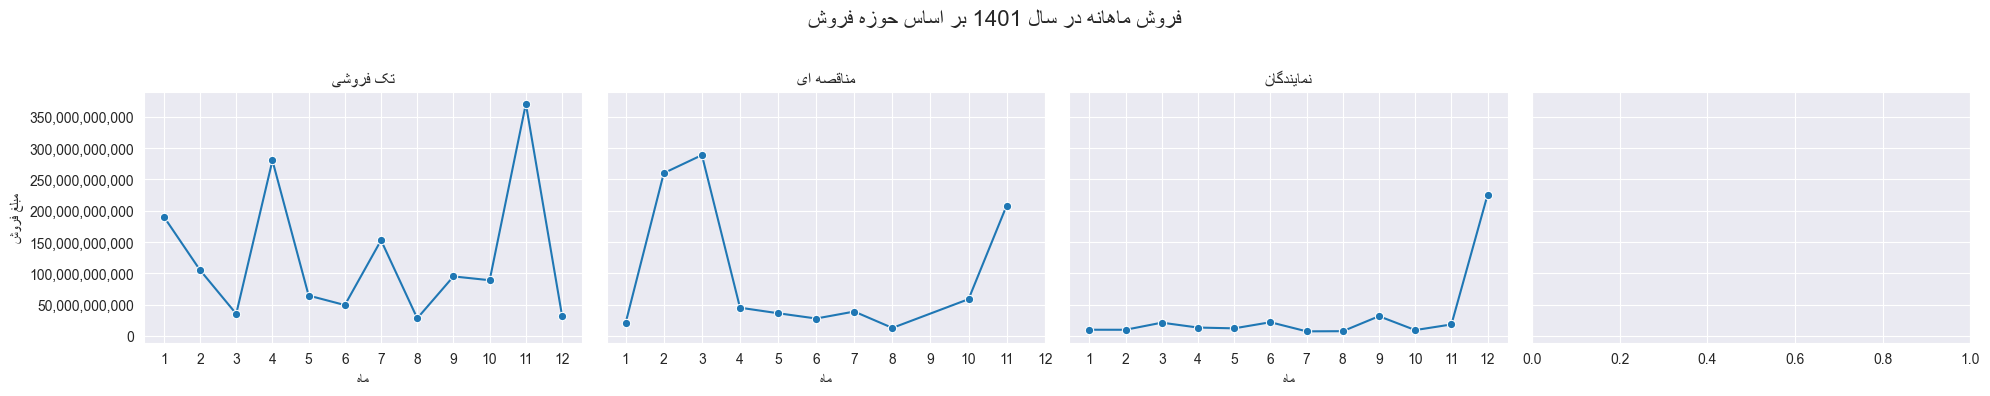

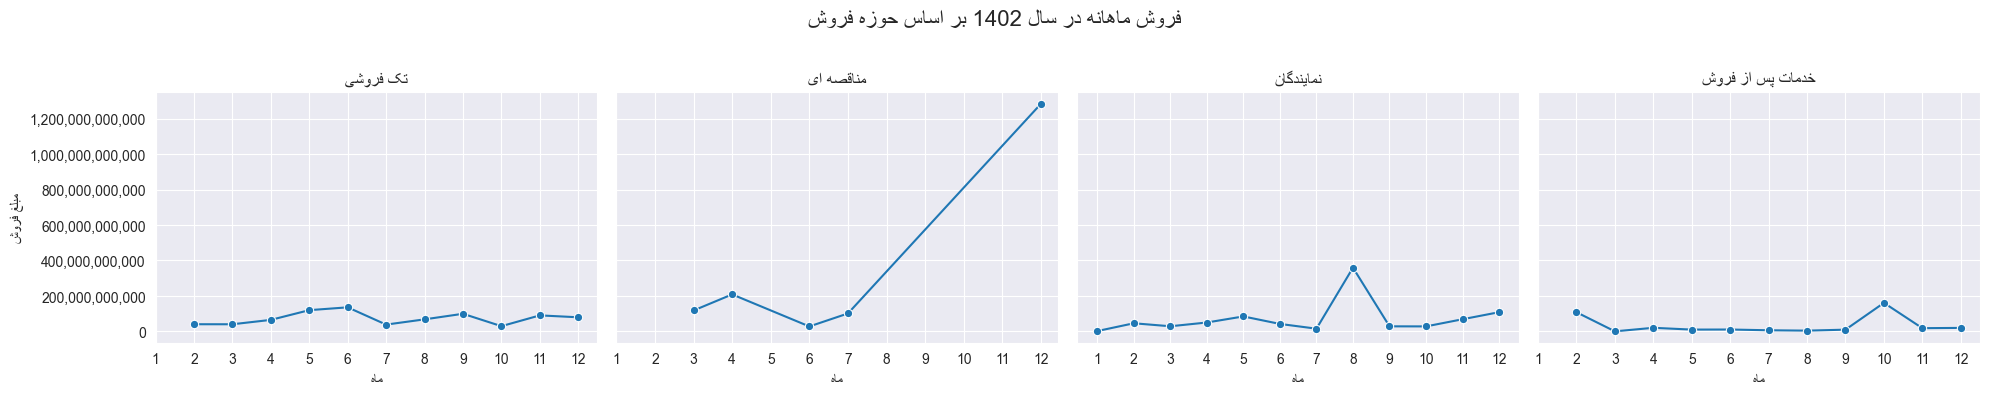

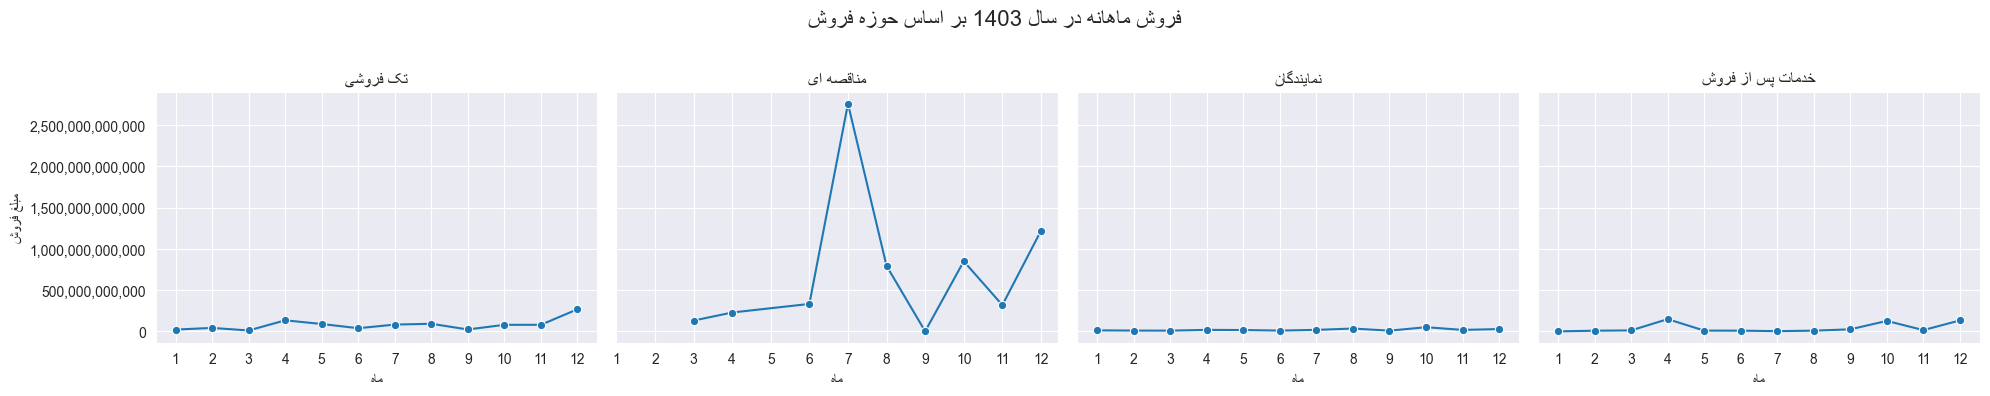

In [189]:
for year in years:
    data_year = grouped[grouped['Year'] == year]
    num_areas = len(sales_areas)
    
    fig, axes = plt.subplots(1, num_areas, figsize=(5 * num_areas, 4), sharey=True)
    fig.suptitle(reshape_fa(f'ŸÅÿ±Ÿàÿ¥ ŸÖÿßŸáÿßŸÜŸá ÿØÿ± ÿ≥ÿßŸÑ {year} ÿ®ÿ± ÿßÿ≥ÿßÿ≥ ÿ≠Ÿàÿ≤Ÿá ŸÅÿ±Ÿàÿ¥'), fontsize=16)

    if num_areas == 1:
        axes = [axes]

    for idx, area in enumerate(sales_areas):
        data = data_year[data_year['SalesArea'] == area]
        if data.empty:
            continue

        data = data.sort_values('Month')
        sns.lineplot(ax=axes[idx], data=data, x='Month', y='TotalSales', marker='o')
        axes[idx].set_title(reshape_fa(area), fontsize=12)
        axes[idx].set_xlabel(reshape_fa('ŸÖÿßŸá'))
        if idx == 0:
            axes[idx].set_ylabel(reshape_fa('ŸÖÿ®ŸÑÿ∫ ŸÅÿ±Ÿàÿ¥'))
        else:
            axes[idx].set_ylabel('')
        axes[idx].set_xticks(range(1, 13))
        axes[idx].yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))
        axes[idx].grid(True)

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

<div style="direction: rtl; text-align: right;">
<ul>
  <li> ÿ∑ÿ®ŸÇ ÿß€åŸÜ ŸÜŸÖŸàÿØÿßÿ± ÿØÿ± ÿ≥ÿßŸÑ 1403 ÿØÿ± ÿ™€åÿ±ŸÖÿßŸá ÿ®Ÿá ÿπŸÑÿ™ ÿß€åŸÜ⁄©Ÿá ÿØŸÖÿß€å ŸáŸàÿß ÿ®€åÿ¥ÿ™ÿ± ÿ®ŸàÿØŸá Ÿà ŸÇÿ∏ÿπ€å ÿ®ÿ±ŸÇ ŸáŸÖ ÿ®Ÿá ÿ∑ÿ®ÿπ ÿ®€åÿ¥ÿ™ÿ± ÿ®ŸàÿØŸá ŸÅÿ±Ÿàÿ¥ ŸÜÿ≥ÿ®ÿ™ ÿ®Ÿá ŸÖÿßŸá Ÿáÿß€å ŸÇÿ®ŸÑ ÿßŸÅÿ≤ÿß€åÿ¥ ÿØÿßÿ¥ÿ™Ÿá </li>
  <li>ŸáŸÖ⁄ÜŸÜ€åŸÜ ÿØÿ± ÿ≥ÿßŸÑ 403 ÿ®€åÿ¥ÿ™ÿ±€åŸÜ ŸÅÿ±Ÿàÿ¥ ŸÖÿ±ÿ®Ÿàÿ∑ ÿ®Ÿá ÿ≠Ÿàÿ≤Ÿá ŸÖŸÜÿßŸÇÿµŸá ÿß€å ÿ®ŸàÿØŸá ÿßÿ≥ÿ™ ⁄©Ÿá ÿØÿ± ŸÖŸáÿ±ŸÖÿßŸá ÿßÿ™ŸÅÿßŸÇ ÿßŸÅÿ™ÿßÿØŸá ÿßÿ≥ÿ™.</li>
  <li>⁄ÜŸàŸÜ ÿ≠Ÿàÿ≤Ÿá ÿÆÿØŸÖÿßÿ™ Ÿæÿ≥ ÿßÿ≤ ŸÅÿ±Ÿàÿ¥ €å⁄©ÿ≠Ÿàÿ≤Ÿá ⁄©ÿßŸÖŸÑÿß ÿ¨ÿØÿß⁄ØÿßŸÜŸá ÿßÿ≥ÿ™ Ÿæÿ≥ ÿ®Ÿá ÿ∑Ÿàÿ± ÿØŸÇ€åŸÇ ŸÜŸÖ€å ÿ™ŸàÿßŸÜ ÿ¢ŸÜ ÿ±ÿß ÿ®ÿß ÿ≠Ÿàÿ≤Ÿá Ÿáÿß€å ÿØ€å⁄Øÿ± ŸÖŸÇÿß€åÿ≥Ÿá ⁄©ÿ±ÿØ Ÿà ÿ®ÿß€åÿØ ŸÖŸÇÿß€åÿ≥Ÿá ÿ¨ÿØÿß⁄ØÿßŸÜŸá ÿ®ÿßÿ¥ÿØ                                                                                                                                        .</li>
  <li>ÿØÿ± ÿ≠ÿßŸÑ ÿ±ÿ¥ÿØ ŸÖŸÑÿß€åŸÖ ÿßÿ≥ÿ™.ÿπŸÑÿ™ ÿß€åŸÜ⁄©Ÿá ÿ≠Ÿàÿ≤Ÿá ÿÆÿØŸÖÿßÿ™ Ÿæÿ≥ ÿßÿ≤ ŸÅÿ±Ÿàÿ¥ ÿØÿ±ÿ≥ÿßŸÑ Ÿáÿß€å 1400Ÿà1401 ŸÅÿ±Ÿàÿ¥ ŸÜÿØÿßÿ¥ÿ™Ÿá ÿπÿØŸÖ ÿ±ÿßŸá ÿßŸÜÿØÿßÿ≤€å ÿÆÿØŸÖÿßÿ™ Ÿæÿ≥ ÿßÿ≤ ŸÅÿ±Ÿàÿ¥ ÿØÿ± ÿ≥€åÿ≥ÿ™ŸÖ ÿßÿ≥ÿ™.</li>
  <li>ÿ≥€åÿ≥ÿ™ŸÖ ŸÅÿ±Ÿàÿ¥ ÿØÿ± ÿßŸÜÿ™Ÿáÿß€å ÿ≥ÿßŸÑ 1400 ÿ±ÿßŸá ÿßŸÜÿØÿßÿ≤€å ÿ¥ÿØŸá ÿßÿ≥ÿ™ .</li>
  <li>ÿ∑ÿ®ŸÇ ŸÜŸÖŸàÿØÿßÿ± ÿØÿ± ÿßŸÜÿ™Ÿáÿß€å ÿ≥ÿßŸÑ 403 ŸÅÿ±Ÿàÿ¥ ÿßŸÅÿ≤ÿß€åÿ¥ ⁄Üÿ¥ŸÖ ⁄Ø€åÿ±€å ÿØÿßÿ¥ÿ™Ÿá ÿßÿ≥ÿ™ Ÿà ÿ®€åÿ¥ÿ™ÿ±€åŸÜ ŸÖŸÇÿØÿßÿ± ŸÅÿ±Ÿàÿ¥ ÿ®ÿ±ÿß€å ŸÖŸÜÿßŸÇÿµŸá ŸÖ€å ÿ®ÿßÿ¥ÿØ . </li>
  <li>ŸÜŸÖÿß€åŸÜÿØ⁄ØÿßŸÜ ÿ®€åÿ¥ÿ™ÿ± ÿØÿ± ÿ≥ÿßŸÑ €±€¥€∞€≤ ŸÅÿπÿßŸÑ ÿ®ŸàÿØŸá‚ÄåÿßŸÜÿØ (Ÿæ€å⁄© ÿØÿ± ŸÖÿßŸá €∏).</li>
  <li></li>
  <li></li>
  <li></li>
  <li></li>
  <li></li>
</ul>
</div>

<div align="center" style="font-size: 30px; font-weight: bold;">
  <strong>ÿ®€åÿ¥ÿ™ÿ±€åŸÜ ŸÅÿ±Ÿàÿ¥ ÿØÿ± Ÿáÿ± ŸÖÿßŸá Ÿà ŸÖÿ¥ÿ™ÿ±€å ŸÖÿ±ÿ®Ÿàÿ∑ ÿ®Ÿá ÿ¢ŸÜ</strong>
</div>

In [168]:

df_invoice['SalesArea'] = df_invoice['SalesArea']
grouped_Customer = df_invoice.groupby(['Month_Jalali', 'SalesArea', 'CustomerRef'])['InvoiceNetPrice'].sum().reset_index()

# Ÿæ€åÿØÿß ⁄©ÿ±ÿØŸÜ ÿß€åŸÜÿØ⁄©ÿ≥ ÿ®€åÿ¥ÿ™ÿ±€åŸÜ ŸÅÿ±Ÿàÿ¥ ÿ®ÿ±ÿß€å Ÿáÿ± (ŸÖÿßŸáÿå ÿ≠Ÿàÿ≤Ÿá ŸÅÿ±Ÿàÿ¥)
idx = grouped_Customer.groupby(['Month_Jalali', 'SalesArea'])['InvoiceNetPrice'].idxmax()

# ÿßŸÜÿ™ÿÆÿßÿ® ÿ±⁄©Ÿàÿ±ÿØŸáÿß ÿ®ÿß ÿ®€åÿ¥ÿ™ÿ±€åŸÜ ŸÅÿ±Ÿàÿ¥
top_customers_by_area_month = grouped_Customer.loc[idx].reset_index(drop=True)

print(top_customers_by_area_month)
top_customers_by_area_month.to_excel('top_customers_by_area_month.xlsx', index=False)


    Month_Jalali         SalesArea  CustomerRef  InvoiceNetPrice
0        1400/11          ÿ™⁄© ŸÅÿ±Ÿàÿ¥€å        13015      17404684000
1        1400/11         ŸÖŸÜÿßŸÇÿµŸá ÿß€å        13832      34228725000
2        1400/11         ŸÜŸÖÿß€åŸÜÿØ⁄ØÿßŸÜ            3       4643945000
3        1400/12          ÿ™⁄© ŸÅÿ±Ÿàÿ¥€å          128      28541432000
4        1400/12         ŸÖŸÜÿßŸÇÿµŸá ÿß€å        18928     355720652967
..           ...               ...          ...              ...
119      1403/11         ŸÜŸÖÿß€åŸÜÿØ⁄ØÿßŸÜ        20636       7664855000
120      1403/12          ÿ™⁄© ŸÅÿ±Ÿàÿ¥€å        94405     201463900001
121      1403/12  ÿÆÿØŸÖÿßÿ™ Ÿæÿ≥ ÿßÿ≤ ŸÅÿ±Ÿàÿ¥        13228     119625000000
122      1403/12         ŸÖŸÜÿßŸÇÿµŸá ÿß€å        18806    1199863500000
123      1403/12         ŸÜŸÖÿß€åŸÜÿØ⁄ØÿßŸÜ        15205       6545550000

[124 rows x 4 columns]






<div align="center" style="font-size: 30px; font-weight: bold;">
  <strong>ŸÜŸÖŸàÿØÿßÿ± ŸÅÿ±Ÿàÿ¥ ŸÖÿßŸáÿßŸÜŸá</strong>
</div>



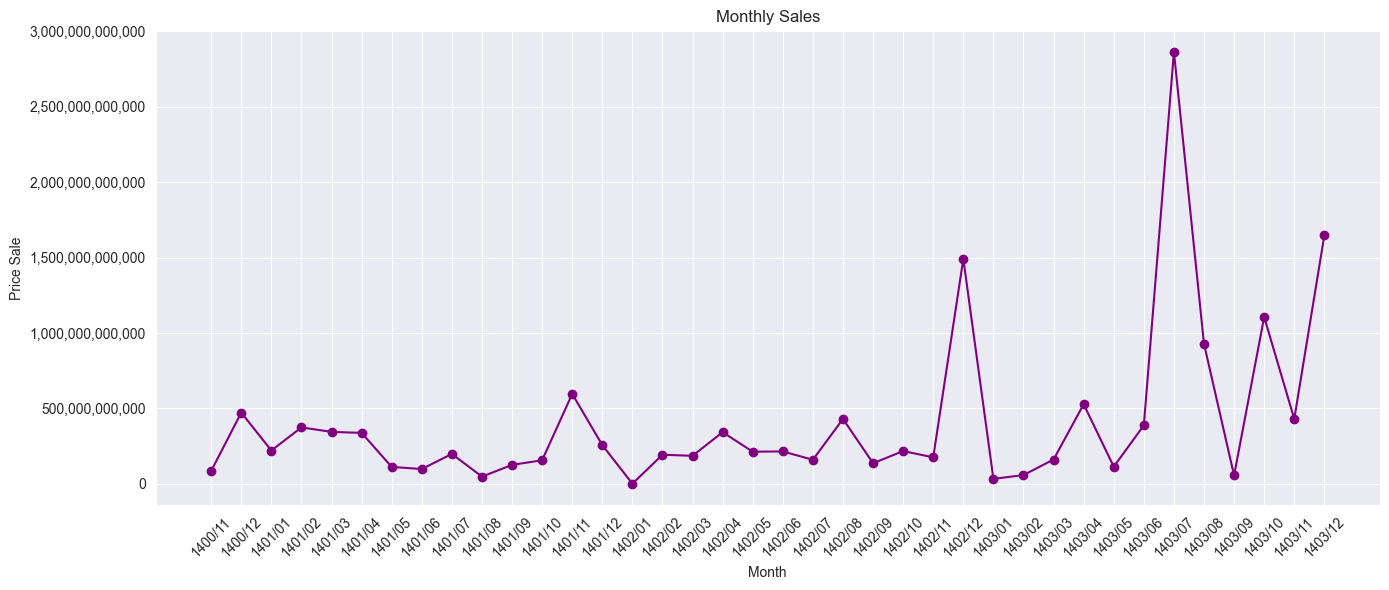

In [57]:


plt.figure(figsize=(14, 6))
plt.plot(monthly_sales['Month'], monthly_sales['TotalSales'], marker='o', linestyle='-', color='purple')
plt.xticks(rotation=45)
plt.title('Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Price Sale')
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.grid(True)
plt.tight_layout()
plt.show()

<div align="center" style="font-size: 30px; font-weight: bold;">
  <strong>ŸÜŸÖŸàÿØÿßÿ± ŸÅÿ±Ÿàÿ¥ ÿ≥ÿßŸÑÿßŸÜŸá</strong>
</div>


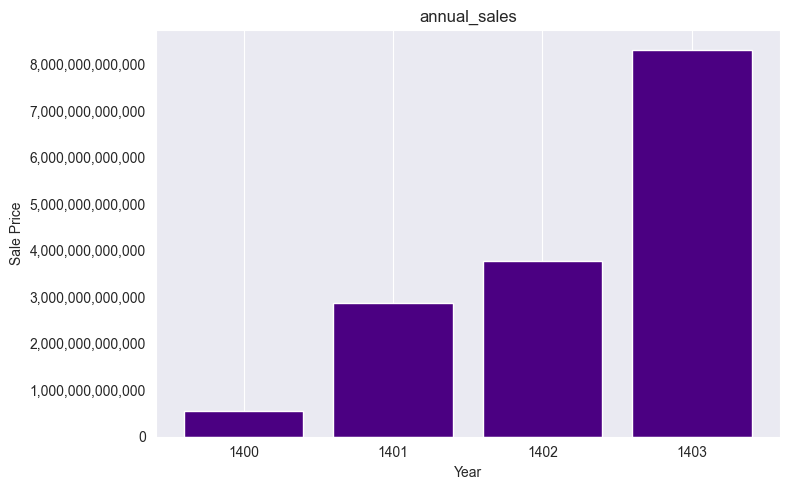

In [58]:
plt.figure(figsize=(8, 5))
plt.bar(annual_sales['Year'], annual_sales['TotalSales'], color='indigo')
plt.title('annual_sales')
plt.xlabel('Year')
plt.ylabel('Sale Price')
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.grid(axis='y')
plt.tight_layout()
plt.show()


<div align="center" style="font-size: 30px; font-weight: bold;">
  <strong> ŸÜŸÖŸàÿØÿßÿ± ŸÅÿ±Ÿàÿ¥ ŸÖÿßŸáÿßŸÜŸá ÿ®ÿ± ÿßÿ≥ÿßÿ≥ ÿ≠Ÿàÿ≤Ÿá ŸÅÿ±Ÿàÿ¥</strong>
</div>


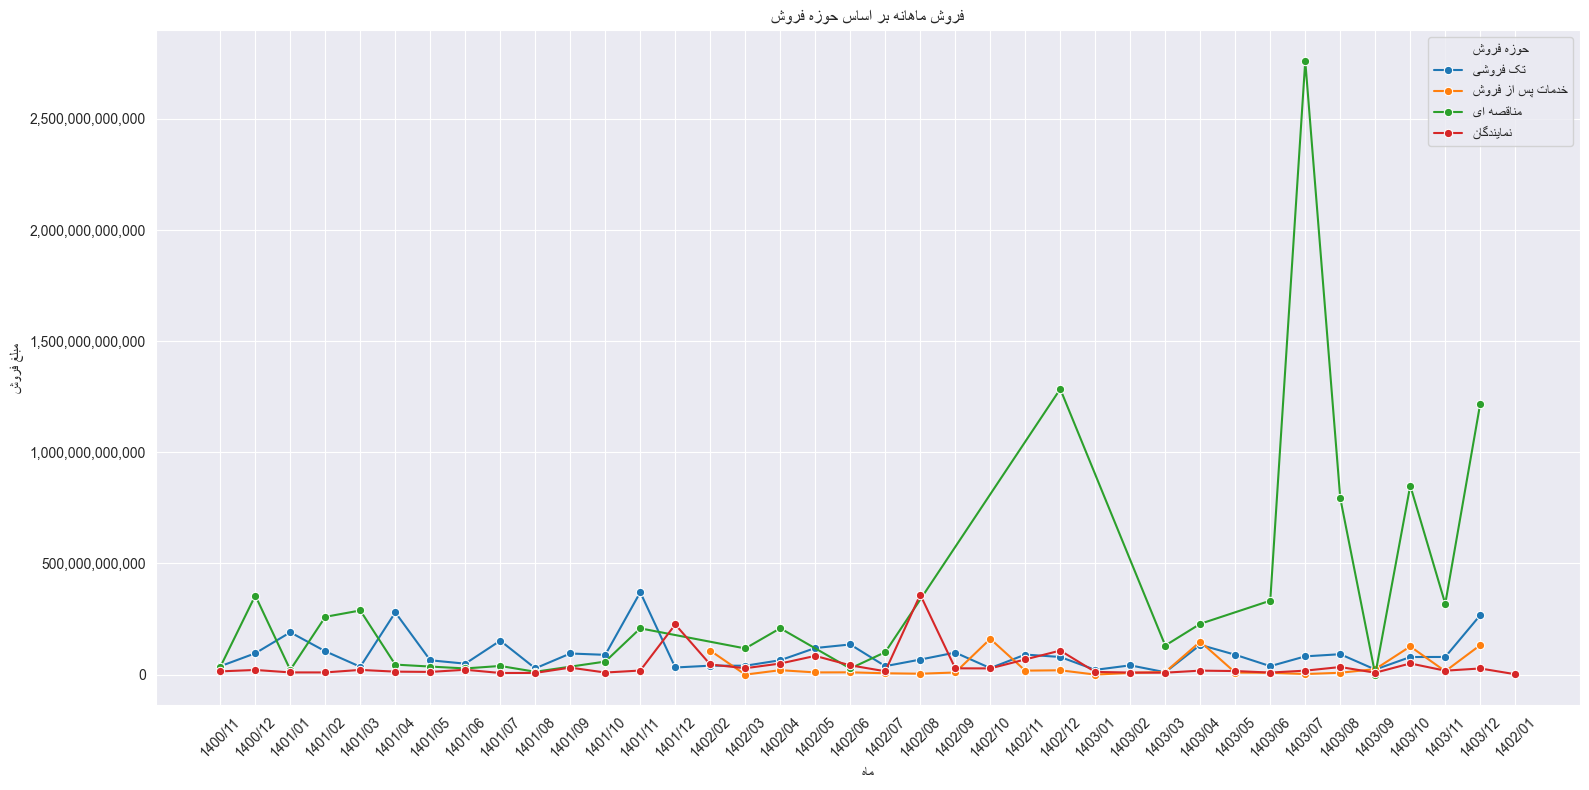

In [86]:


monthly_sales_area = df_invoice.groupby(['SalesArea', 'Month_Jalali'])['InvoiceNetPrice'].sum().reset_index()
monthly_sales_area['SalesArea'] = monthly_sales_area['SalesArea'].apply(reshape_fa)
monthly_sales_area.columns = ['SalesArea', 'Month', 'TotalSales']
plt.figure(figsize=(16, 8))
sns.lineplot(data=monthly_sales_area, x='Month', y='TotalSales', hue='SalesArea', marker='o')
plt.xticks(rotation=45)
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.title(reshape_fa('ŸÅÿ±Ÿàÿ¥ ŸÖÿßŸáÿßŸÜŸá ÿ®ÿ± ÿßÿ≥ÿßÿ≥ ÿ≠Ÿàÿ≤Ÿá ŸÅÿ±Ÿàÿ¥'))
plt.xlabel(reshape_fa('ŸÖÿßŸá'))
plt.ylabel(reshape_fa('ŸÖÿ®ŸÑÿ∫ ŸÅÿ±Ÿàÿ¥'))
plt.legend(title=reshape_fa('ÿ≠Ÿàÿ≤Ÿá ŸÅÿ±Ÿàÿ¥'))
plt.tight_layout()
plt.show()






<div align="center" style="font-size: 30px; font-weight: bold;">
  <strong>ŸÜŸàÿØÿßÿ± ŸÅÿ±Ÿàÿ¥ ŸÖÿßŸáÿßŸÜŸá ÿ®ÿ± ÿßÿ≥ÿßÿ≥ ÿÆÿØŸÖÿßÿ™ Ÿæÿ≥ ÿßÿ≤ ŸÅÿ±Ÿàÿ¥</strong>
</div>


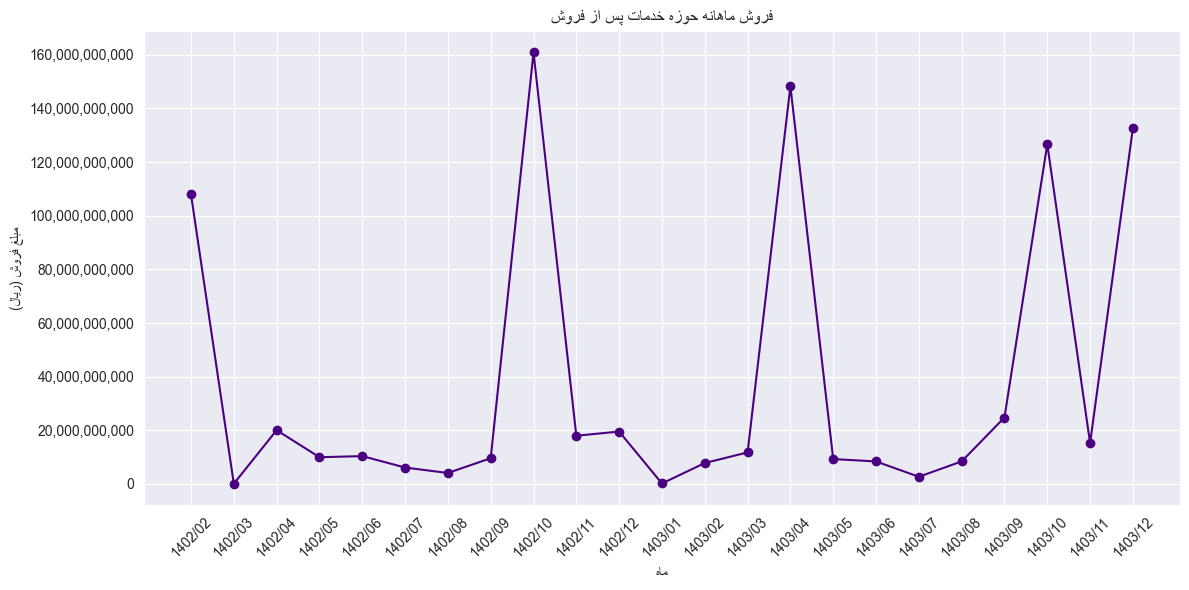

In [87]:
df_service_after_sales_monthly = monthly_sales_area[monthly_sales_area['SalesArea'] == reshape_fa('ÿÆÿØŸÖÿßÿ™ Ÿæÿ≥ ÿßÿ≤ ŸÅÿ±Ÿàÿ¥')]
plt.figure(figsize=(12,6))
plt.plot(df_service_after_sales_monthly['Month'], df_service_after_sales_monthly['TotalSales'], marker='o', color='indigo')
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.title(reshape_fa('ŸÅÿ±Ÿàÿ¥ ŸÖÿßŸáÿßŸÜŸá ÿ≠Ÿàÿ≤Ÿá ÿÆÿØŸÖÿßÿ™ Ÿæÿ≥ ÿßÿ≤ ŸÅÿ±Ÿàÿ¥'))
plt.xlabel(reshape_fa('ŸÖÿßŸá'))
plt.ylabel(reshape_fa('ŸÖÿ®ŸÑÿ∫ ŸÅÿ±Ÿàÿ¥ (ÿ±€åÿßŸÑ)'))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



<div style="direction: rtl; text-align: right;">
<ul>
  <li>ÿßŸÜÿ≠ÿ±ÿßŸÅ ŸÖÿπ€åÿßÿ± ÿ®ÿßŸÑÿß €åÿπŸÜ€å ŸÅÿ±Ÿàÿ¥ ŸÖÿßŸáÿßŸÜŸá ŸÜŸàÿ≥ÿßŸÜ ÿØÿßÿ±Ÿá</li>
</ul>
</div>


In [88]:
data = df_service_after_sales_monthly['TotalSales']

mean_val = data.mean()
median_val = data.median()
std_dev_val = data.std()
skewness_val = skew(data)
kurtosis_val = kurtosis(data)

print(f"ŸÖ€åÿßŸÜ⁄Ø€åŸÜ: {mean_val:,.0f}")
print(f"ŸÖ€åÿßŸÜŸá: {median_val:,.0f}")
print(f"ÿßŸÜÿ≠ÿ±ÿßŸÅ ŸÖÿπ€åÿßÿ±: {std_dev_val:,.0f}")
print(f"⁄ÜŸàŸÑ⁄Ø€å (skewness): {skewness_val:.2f}")
print(f"⁄©ÿ¥€åÿØ⁄Ø€å (kurtosis): {kurtosis_val:.2f}")

ŸÖ€åÿßŸÜ⁄Ø€åŸÜ: 37,458,680,810
ŸÖ€åÿßŸÜŸá: 10,335,385,450
ÿßŸÜÿ≠ÿ±ÿßŸÅ ŸÖÿπ€åÿßÿ±: 53,731,726,949
⁄ÜŸàŸÑ⁄Ø€å (skewness): 1.42
⁄©ÿ¥€åÿØ⁄Ø€å (kurtosis): 0.22


<div align="center" style="font-size: 30px; font-weight: bold;">
  <strong>ŸÜŸÖŸàÿØÿßÿ± ŸÅÿ±Ÿàÿ¥ ŸÖÿßŸáÿßŸÜŸá ÿ®Ÿá ÿ¨ÿ≤ ÿÆÿØŸÖÿßÿ™ Ÿæÿ≥ ÿßÿ≤ ŸÅÿ±Ÿàÿ¥</strong>
</div>


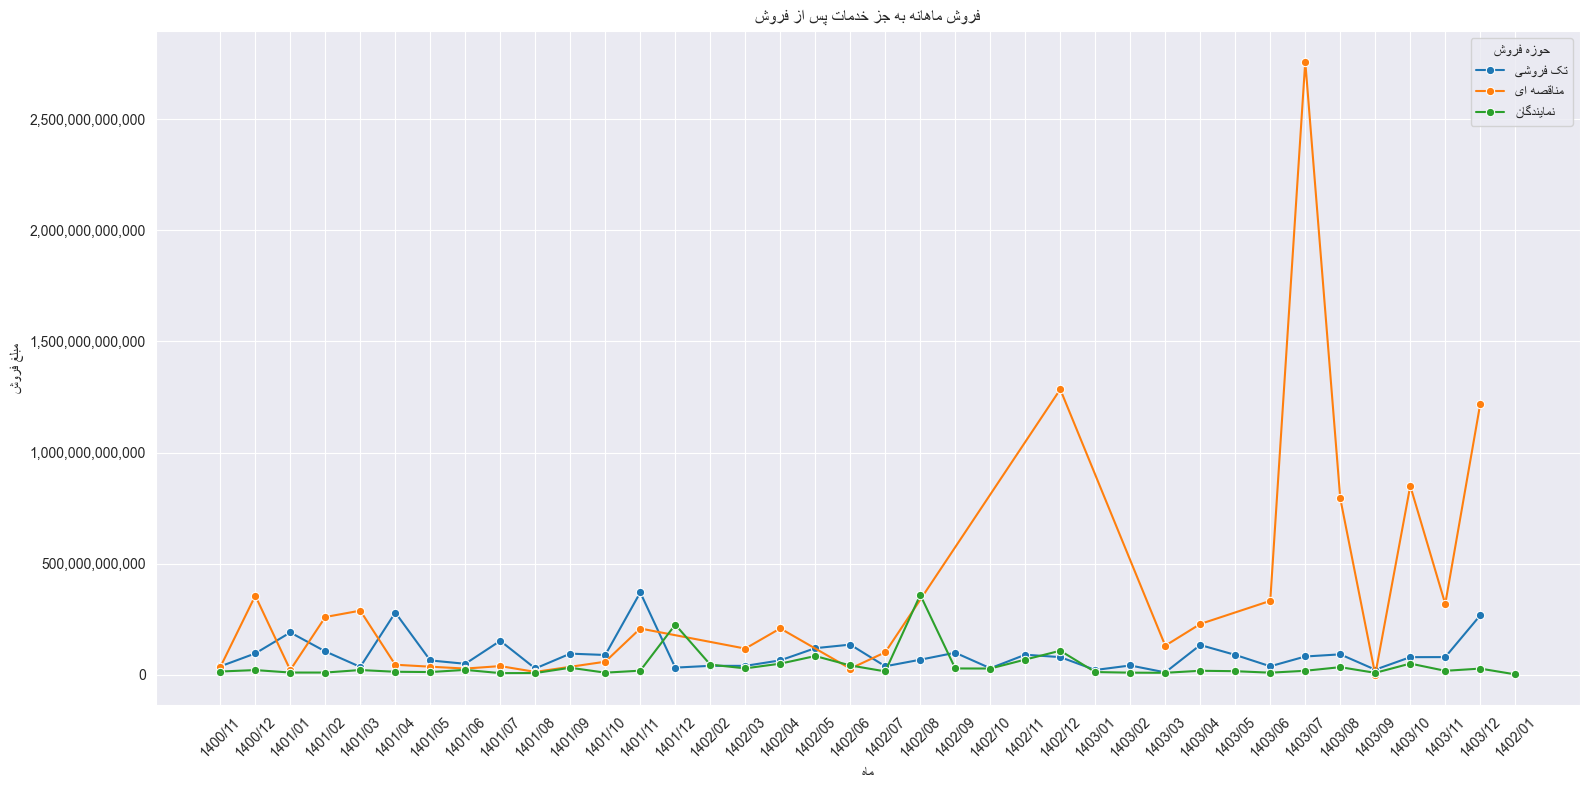

In [61]:
df_service_after_sales_monthly = monthly_sales_area[monthly_sales_area['SalesArea'] != reshape_fa('ÿÆÿØŸÖÿßÿ™ Ÿæÿ≥ ÿßÿ≤ ŸÅÿ±Ÿàÿ¥')]
plt.figure(figsize=(16, 8))
sns.lineplot(
    data=df_service_after_sales_monthly,
    x='Month',
    y='TotalSales',
    hue='SalesArea',
    marker='o'
)
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.xticks(rotation=45)
plt.title(reshape_fa('ŸÅÿ±Ÿàÿ¥ ŸÖÿßŸáÿßŸÜŸá ÿ®Ÿá ÿ¨ÿ≤ ÿÆÿØŸÖÿßÿ™ Ÿæÿ≥ ÿßÿ≤ ŸÅÿ±Ÿàÿ¥'))
plt.xlabel(reshape_fa('ŸÖÿßŸá'))
plt.ylabel(reshape_fa('ŸÖÿ®ŸÑÿ∫ ŸÅÿ±Ÿàÿ¥'))
plt.legend(title=reshape_fa('ÿ≠Ÿàÿ≤Ÿá ŸÅÿ±Ÿàÿ¥'), loc='best')
plt.tight_layout()
plt.show()


<div align="center" style="font-size: 30px; font-weight: bold;">
  <strong>ŸÜŸÖŸàÿØÿßÿ± ŸÅÿ±Ÿàÿ¥ ÿ≥ÿßŸÑÿßŸÜŸá ÿ®ÿ± ÿßÿ≥ÿßÿ≥ ÿ≠Ÿàÿ≤Ÿá ŸÅÿ±Ÿàÿ¥</strong>
</div>

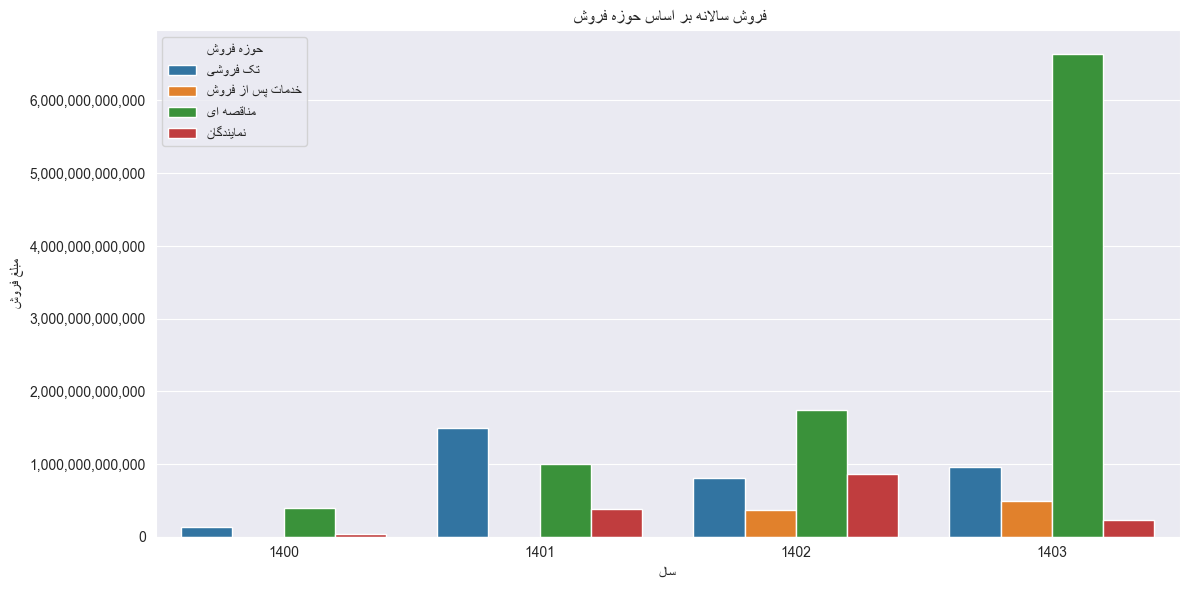

In [62]:
annual_sales_area = df_invoice.groupby(['SalesArea', 'Year_Jalali'])['InvoiceNetPrice'].sum().reset_index()
annual_sales_area['SalesArea'] = annual_sales_area['SalesArea'].apply(reshape_fa)
annual_sales_area.columns = ['SalesArea', 'Year', 'TotalSales']

plt.figure(figsize=(12, 6))
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))
sns.barplot(data=annual_sales_area, x='Year', y='TotalSales', hue='SalesArea')
plt.title(reshape_fa('ŸÅÿ±Ÿàÿ¥ ÿ≥ÿßŸÑÿßŸÜŸá ÿ®ÿ± ÿßÿ≥ÿßÿ≥ ÿ≠Ÿàÿ≤Ÿá ŸÅÿ±Ÿàÿ¥ '))
plt.xlabel(reshape_fa('ÿ≥ÿßŸÑ'))
plt.ylabel(reshape_fa('ŸÖÿ®ŸÑÿ∫ ŸÅÿ±Ÿàÿ¥'))
plt.legend(title=reshape_fa('ÿ≠Ÿàÿ≤Ÿá ŸÅÿ±Ÿàÿ¥'), loc='best')
plt.tight_layout()
plt.show()


<div align="center" style="font-size: 30px; font-weight: bold;">
  <strong>ŸÜŸÖŸàÿØÿßÿ± ŸÅÿ±Ÿàÿ¥ ÿ≥ÿßŸÑÿßŸÜŸá ÿ®Ÿá ÿ¨ÿ≤ ÿÆÿØŸÖÿßÿ™ Ÿæÿ≥ ÿßÿ≤ ŸÅÿ±Ÿàÿ¥</strong>
</div>

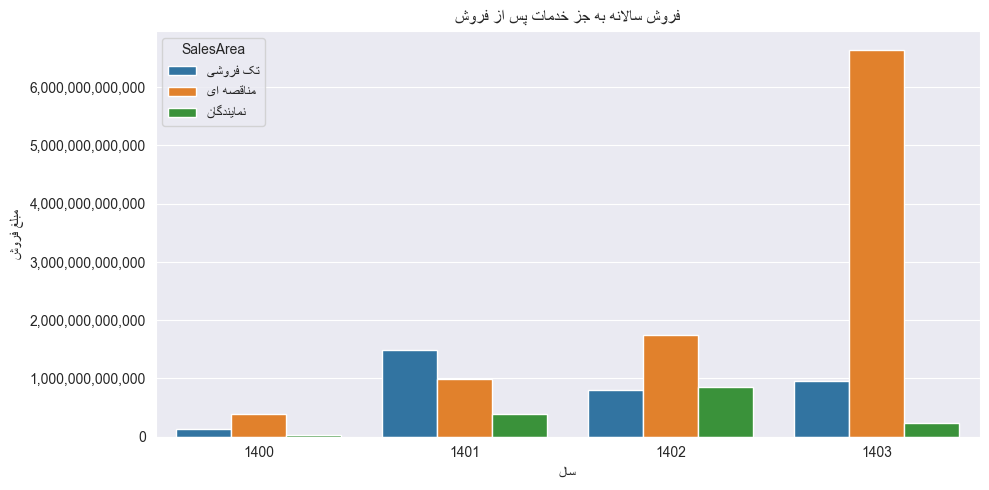

In [63]:
df_service_after_sales_annual = annual_sales_area[annual_sales_area['SalesArea'] != reshape_fa('ÿÆÿØŸÖÿßÿ™ Ÿæÿ≥ ÿßÿ≤ ŸÅÿ±Ÿàÿ¥')]
plt.figure(figsize=(10,5))
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))
sns.barplot(data=df_service_after_sales_annual, x='Year', y='TotalSales', hue='SalesArea')
plt.title(reshape_fa('ŸÅÿ±Ÿàÿ¥ ÿ≥ÿßŸÑÿßŸÜŸá ÿ®Ÿá ÿ¨ÿ≤ ÿÆÿØŸÖÿßÿ™ Ÿæÿ≥ ÿßÿ≤ ŸÅÿ±Ÿàÿ¥'))
plt.xlabel(reshape_fa('ÿ≥ÿßŸÑ'))
plt.ylabel(reshape_fa('ŸÖÿ®ŸÑÿ∫ ŸÅÿ±Ÿàÿ¥'))

plt.tight_layout()
plt.show()


<div align="center" style="font-size: 30px; font-weight: bold;">
  <strong>ŸÜŸÖŸàÿØÿßÿ± ŸÅÿ±Ÿàÿ¥ ÿ≥ÿßŸÑÿßŸÜŸá ÿÆÿØŸÖÿßÿ™ Ÿæÿ≥ ÿßÿ≤ ŸÅÿ±Ÿàÿ¥</strong>
</div>

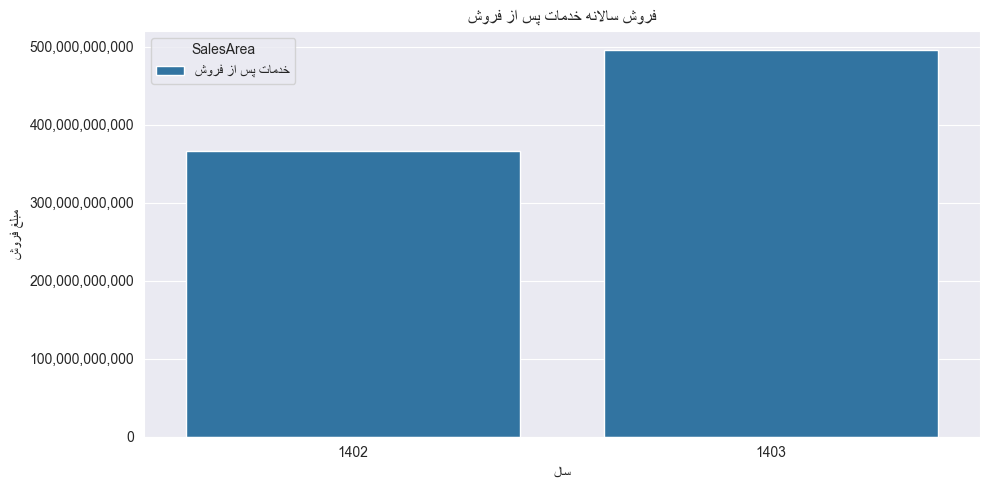

In [64]:
df_service_after_sales_annual = annual_sales_area[annual_sales_area['SalesArea'] == reshape_fa('ÿÆÿØŸÖÿßÿ™ Ÿæÿ≥ ÿßÿ≤ ŸÅÿ±Ÿàÿ¥')]
plt.figure(figsize=(10,5))
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))
sns.barplot(data=df_service_after_sales_annual, x='Year', y='TotalSales', hue='SalesArea')
plt.title(reshape_fa('ŸÅÿ±Ÿàÿ¥ ÿ≥ÿßŸÑÿßŸÜŸá ÿÆÿØŸÖÿßÿ™ Ÿæÿ≥ ÿßÿ≤ ŸÅÿ±Ÿàÿ¥'))
plt.xlabel(reshape_fa('ÿ≥ÿßŸÑ'))
plt.ylabel(reshape_fa('ŸÖÿ®ŸÑÿ∫ ŸÅÿ±Ÿàÿ¥'))

plt.tight_layout()
plt.show()

<div align="center" style="font-size: 30px; font-weight: bold;">
  <strong>ŸÖ€åÿßŸÜ⁄Ø€åŸÜ ÿÆÿ±€åÿØ Ÿáÿ± ŸÖÿ¥ÿ™ÿ±€å</strong>
</div>

In [65]:


avg_payment_per_customer = df_invoice.groupby('CustomerRef')['InvoiceNetPrice'].mean().reset_index()
avg_payment_per_customer.columns = ['CustomerRef', 'AverageInvoiceNetPrice']
print( avg_payment_per_customer.loc[avg_payment_per_customer['AverageInvoiceNetPrice'].idxmax()])
avg_payment_per_customer.to_excel('avg_payment_per_customer.xlsx',index=False)


CustomerRef               1.790900e+04
AverageInvoiceNetPrice    2.952532e+11
Name: 241, dtype: float64


<div align="center" style="font-size: 30px; font-weight: bold;">
  <strong>ÿ™ÿπ€å€åŸÜ ÿØÿ±ÿµÿØ ŸÖÿ¥ÿ™ÿ±€åÿßŸÜ ŸàŸÅÿßÿØÿßÿ±</strong>
</div>

     CustomerRef  InvoiceCount
0              3            23
1              4             1
2              5             1
3              6             1
4             21             1
..           ...           ...
761        94393             1
762        94399             1
763        94405             2
764        94407             1
765        94414             1

[766 rows x 2 columns]
ÿ™ÿπÿØÿßÿØ ⁄©ŸÑ ŸÖÿ¥ÿ™ÿ±€åÿßŸÜ: 766
ÿ™ÿπÿØÿßÿØ ŸÖÿ¥ÿ™ÿ±€åÿßŸÜ ŸàŸÅÿßÿØÿßÿ±: 365 (47.65%)
ÿ™ÿπÿØÿßÿØ ŸÖÿ¥ÿ™ÿ±€åÿßŸÜ ÿ¨ÿØ€åÿØ: 401 (52.35%)


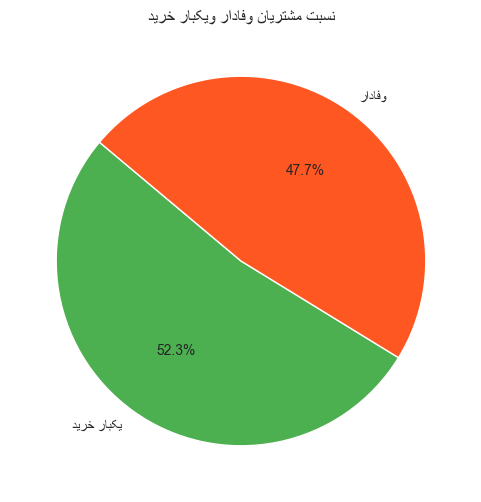

In [66]:
#  ÿ™ÿπÿØÿßÿØ ŸÅÿß⁄©ÿ™Ÿàÿ±Ÿáÿß€å Ÿáÿ± ŸÖÿ¥ÿ™ÿ±€å
customer_purchase_counts = df_invoice.groupby('CustomerRef').size().reset_index(name='InvoiceCount')
print(customer_purchase_counts)

#  ÿ™ÿπ€å€åŸÜ ŸÜŸàÿπ ŸÖÿ¥ÿ™ÿ±€å ÿ®ÿ± ÿßÿ≥ÿßÿ≥ ÿ™ÿπÿØÿßÿØ ŸÅÿß⁄©ÿ™Ÿàÿ±
customer_purchase_counts['CustomerType'] = customer_purchase_counts['InvoiceCount'].apply(
lambda x: 'ŸàŸÅÿßÿØÿßÿ±' if x > 1 else '€å⁄©ÿ®ÿßÿ± ÿÆÿ±€åÿØ'
)

#  ÿ™ÿπÿØÿßÿØ ŸÖÿ¥ÿ™ÿ±€åÿßŸÜ ⁄©ŸÑÿå ŸàŸÅÿßÿØÿßÿ± Ÿà ÿ¨ÿØ€åÿØ
total_customers = customer_purchase_counts.shape[0]
loyal_customers = customer_purchase_counts[customer_purchase_counts['CustomerType'] == 'ŸàŸÅÿßÿØÿßÿ±'].shape[0]
new_customers = customer_purchase_counts[customer_purchase_counts['CustomerType'] == '€å⁄©ÿ®ÿßÿ± ÿÆÿ±€åÿØ'].shape[0]
customer_purchase_counts['CustomerType'] = customer_purchase_counts['CustomerType'].apply(reshape_fa)

percent_loyal = (loyal_customers / total_customers) * 100
percent_new = (new_customers / total_customers) * 100

print(f"ÿ™ÿπÿØÿßÿØ ⁄©ŸÑ ŸÖÿ¥ÿ™ÿ±€åÿßŸÜ: {total_customers}")
print(f"ÿ™ÿπÿØÿßÿØ ŸÖÿ¥ÿ™ÿ±€åÿßŸÜ ŸàŸÅÿßÿØÿßÿ±: {loyal_customers} ({percent_loyal:.2f}%)")
print(f"ÿ™ÿπÿØÿßÿØ ŸÖÿ¥ÿ™ÿ±€åÿßŸÜ ÿ¨ÿØ€åÿØ: {new_customers} ({percent_new:.2f}%)")

counts = customer_purchase_counts['CustomerType'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', colors=['#4CAF50', '#FF5722'], startangle=140)
plt.title(reshape_fa('ŸÜÿ≥ÿ®ÿ™ ŸÖÿ¥ÿ™ÿ±€åÿßŸÜ ŸàŸÅÿßÿØÿßÿ± Ÿà€å⁄©ÿ®ÿßÿ± ÿÆÿ±€åÿØ'))
plt.show()



In [67]:
loyal_customers_list = customer_purchase_counts[customer_purchase_counts['CustomerType'] == reshape_fa('ŸàŸÅÿßÿØÿßÿ±')]['CustomerRef']
new_customers_list = customer_purchase_counts[customer_purchase_counts['CustomerType'] == reshape_fa('€å⁄©ÿ®ÿßÿ± ÿÆÿ±€åÿØ')]['CustomerRef']

print("ŸÑ€åÿ≥ÿ™ ŸÜŸÖŸàŸÜŸá ŸÖÿ¥ÿ™ÿ±€åÿßŸÜ ŸàŸÅÿßÿØÿßÿ±:")
print(loyal_customers_list.head())

print("\nŸÑ€åÿ≥ÿ™ ŸÜŸÖŸàŸÜŸá ŸÖÿ¥ÿ™ÿ±€åÿßŸÜ €å⁄©ÿ®ÿßÿ± ÿÆÿ±€åÿØ:")
print(new_customers_list.head())


with pd.ExcelWriter('customers_loyal_and_new.xlsx') as writer:
    loyal_customers_list.to_excel(writer, sheet_name='ŸÖÿ¥ÿ™ÿ±€åÿßŸÜ ŸàŸÅÿßÿØÿßÿ±', index=False)
    new_customers_list.to_excel(writer, sheet_name='ŸÖÿ¥ÿ™ÿ±€åÿßŸÜ ÿ®ÿß €å⁄©ÿ®ÿßÿ± ÿÆÿ±€åÿØ', index=False)


ŸÑ€åÿ≥ÿ™ ŸÜŸÖŸàŸÜŸá ŸÖÿ¥ÿ™ÿ±€åÿßŸÜ ŸàŸÅÿßÿØÿßÿ±:
0       3
8     128
9     149
10    152
12    225
Name: CustomerRef, dtype: uint32

ŸÑ€åÿ≥ÿ™ ŸÜŸÖŸàŸÜŸá ŸÖÿ¥ÿ™ÿ±€åÿßŸÜ €å⁄©ÿ®ÿßÿ± ÿÆÿ±€åÿØ:
1     4
2     5
3     6
4    21
5    82
Name: CustomerRef, dtype: uint32


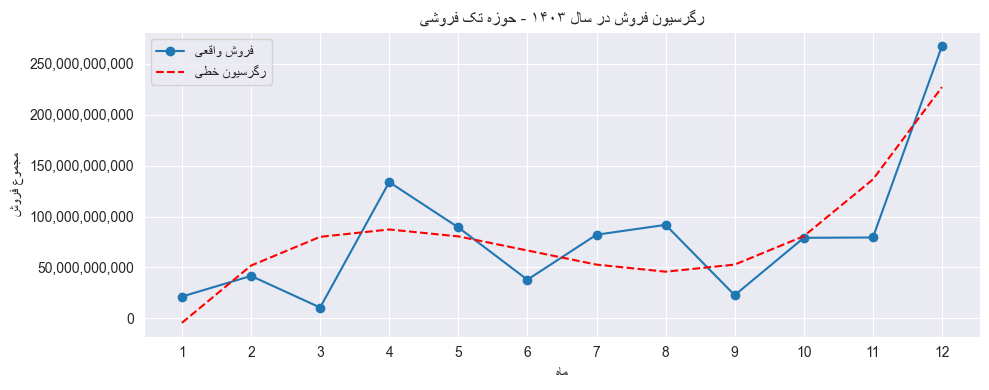

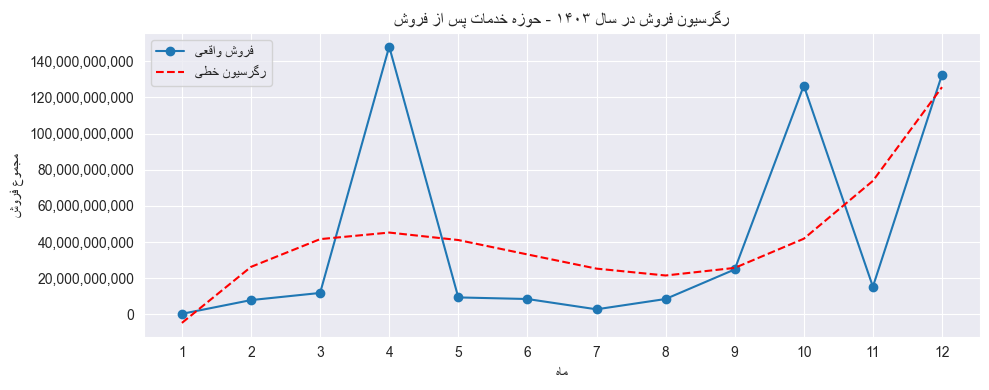

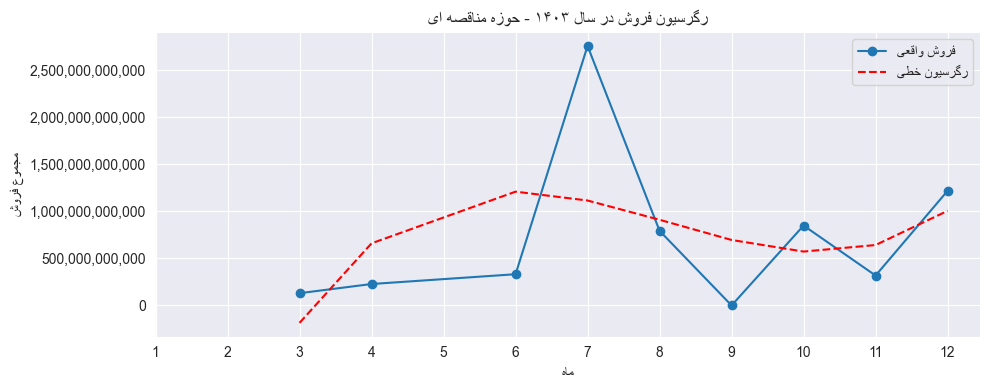

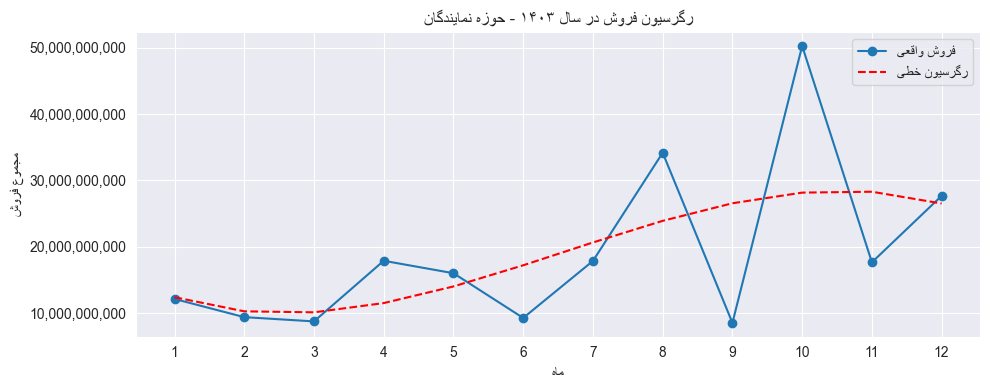

In [210]:


# data_1403 = grouped[grouped['Year'] == '1403']  
# sales_areas_1403 = data_1403[data_1403['SalesArea'] == 'ŸÖŸÜÿßŸÇÿµŸá ÿß€å']
# 
# x = sales_areas_1403['Month']
# y = sales_areas_1403['TotalSales']
# 
# model = np.poly1d(np.polyfit(x, y, 1))  # ŸÖÿØŸÑ ÿ±⁄Øÿ±ÿ≥€åŸàŸÜ ÿÆÿ∑€å
# y_pred = model(x)
# 
# plt.figure(figsize=(10, 4))
# plt.plot(x, y, marker='o', label=reshape_fa('ŸÅÿ±Ÿàÿ¥ ŸàÿßŸÇÿπ€å'))
# plt.plot(x, y_pred, 'r--', label=reshape_fa('ÿ±⁄Øÿ±ÿ≥€åŸàŸÜ ÿÆÿ∑€å'))
# 
# plt.xticks(range(1, 13))
# plt.xlabel(reshape_fa('ŸÖÿßŸá'))
# plt.ylabel(reshape_fa('ŸÖÿ¨ŸÖŸàÿπ ŸÅÿ±Ÿàÿ¥'))
# plt.title(reshape_fa('ÿ±⁄Øÿ±ÿ≥€åŸàŸÜ ŸÅÿ±Ÿàÿ¥ ÿØÿ± ÿ≥ÿßŸÑ €±€¥€∞€≥'))
# 
# plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))  
# 
# plt.grid(True)
# plt.legend()
# plt.tight_layout()
# plt.show()
data_1403 = grouped[grouped['Year'] == '1403']  
sales_areas = data_1403['SalesArea'].unique()

# ÿ≠ŸÑŸÇŸá ÿ®ÿ±ÿß€å Ÿáÿ± ÿ≠Ÿàÿ≤Ÿá ŸÅÿ±Ÿàÿ¥
for area in sales_areas:
    area_data = data_1403[data_1403['SalesArea'] == area]
    
    if len(area_data) < 2:
        continue  # ÿß⁄Øÿ± ÿØÿßÿØŸá ⁄©ÿßŸÅ€å ŸÜÿØÿßÿ¥ÿ™ÿå ÿßÿ≤ ÿß€åŸÜ ÿ≠Ÿàÿ≤Ÿá ÿπÿ®Ÿàÿ± ⁄©ŸÜ

    x = area_data['Month']
    y = area_data['TotalSales']

    model = np.poly1d(np.polyfit(x, y, 3))
    y_pred = model(x)
    


    # ÿ±ÿ≥ŸÖ ŸÜŸÖŸàÿØÿßÿ±
    plt.figure(figsize=(10, 4))
    plt.plot(x, y, marker='o', label=reshape_fa('ŸÅÿ±Ÿàÿ¥ ŸàÿßŸÇÿπ€å'))
    plt.plot(x, y_pred, 'r--', label=reshape_fa('ÿ±⁄Øÿ±ÿ≥€åŸàŸÜ ÿÆÿ∑€å'))

    plt.xticks(range(1, 13))
    plt.xlabel(reshape_fa('ŸÖÿßŸá'))
    plt.ylabel(reshape_fa('ŸÖÿ¨ŸÖŸàÿπ ŸÅÿ±Ÿàÿ¥'))
    plt.title(reshape_fa(f'ÿ±⁄Øÿ±ÿ≥€åŸàŸÜ ŸÅÿ±Ÿàÿ¥ ÿØÿ± ÿ≥ÿßŸÑ €±€¥€∞€≥ - ÿ≠Ÿàÿ≤Ÿá {area}'))

    plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()
    
    
   





ÿ™⁄© ŸÅÿ±Ÿàÿ¥€å: ÿ®Ÿáÿ™ÿ±€åŸÜ ÿØÿ±ÿ¨Ÿá = 5 | MSE = 9.41e+20 | R¬≤ = 0.787


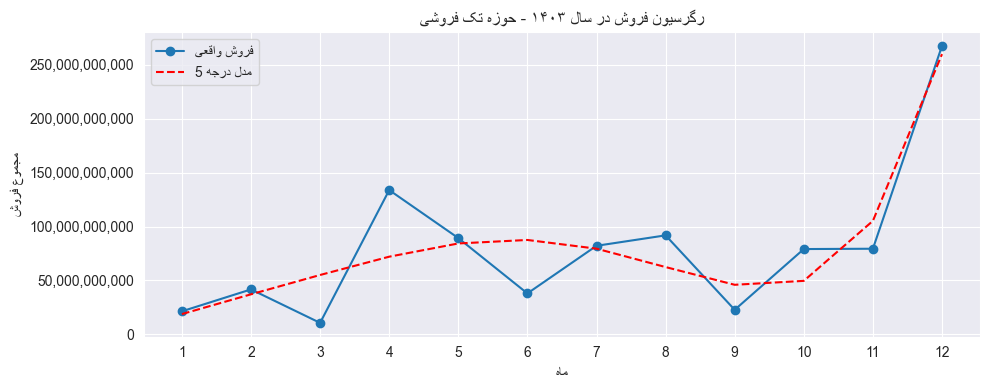


ÿÆÿØŸÖÿßÿ™ Ÿæÿ≥ ÿßÿ≤ ŸÅÿ±Ÿàÿ¥: ÿ®Ÿáÿ™ÿ±€åŸÜ ÿØÿ±ÿ¨Ÿá = 5 | MSE = 1.98e+21 | R¬≤ = 0.347


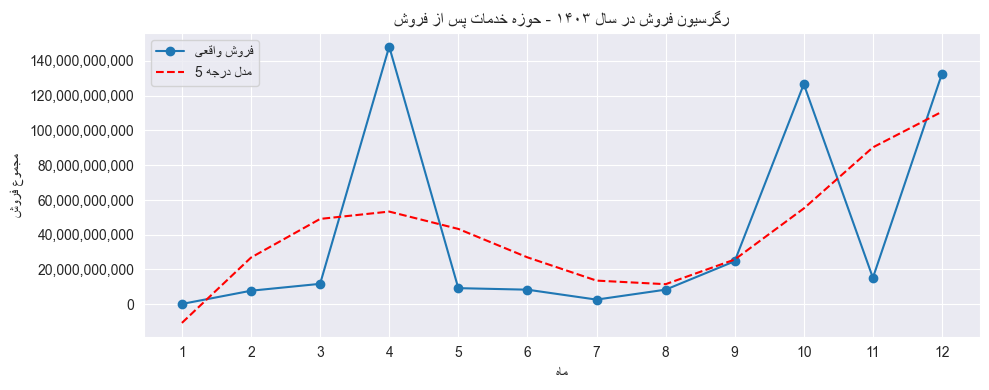


ŸÖŸÜÿßŸÇÿµŸá ÿß€å: ÿ®Ÿáÿ™ÿ±€åŸÜ ÿØÿ±ÿ¨Ÿá = 5 | MSE = 3.95e+23 | R¬≤ = 0.393


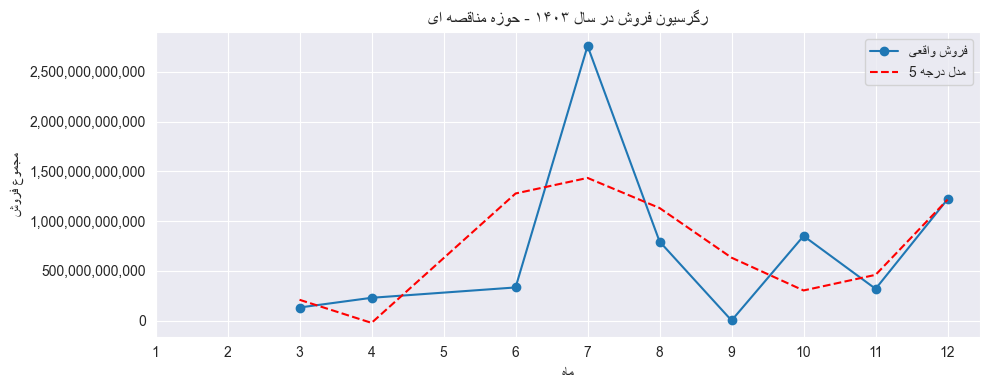


ŸÜŸÖÿß€åŸÜÿØ⁄ØÿßŸÜ: ÿ®Ÿáÿ™ÿ±€åŸÜ ÿØÿ±ÿ¨Ÿá = 5 | MSE = 9.46e+19 | R¬≤ = 0.349


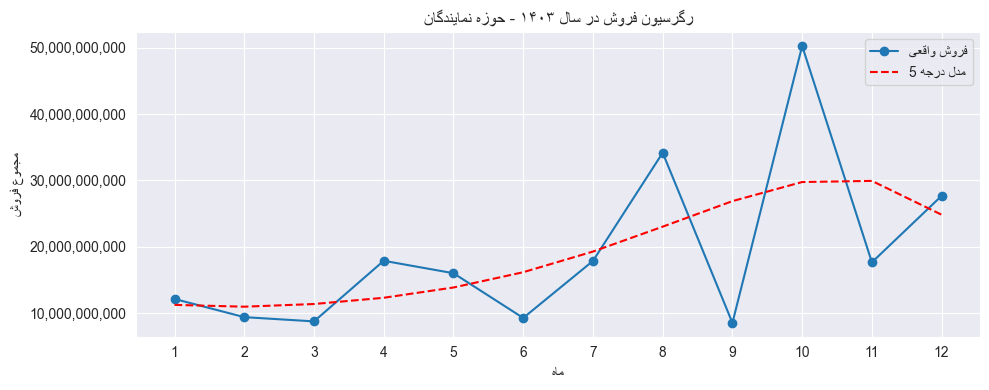

In [211]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# ŸÅ€åŸÑÿ™ÿ± ÿØÿßÿØŸá‚ÄåŸáÿß ÿ®ÿ±ÿß€å ÿ≥ÿßŸÑ €±€¥€∞€≥
data_1403 = grouped[grouped['Year'] == '1403']

# ÿ≠ŸÑŸÇŸá ÿ®ÿ±ÿß€å ŸáŸÖŸá ÿ≠Ÿàÿ≤Ÿá‚ÄåŸáÿß€å ŸÅÿ±Ÿàÿ¥
sales_areas = data_1403['SalesArea'].unique()

for area in sales_areas:
    area_data = data_1403[data_1403['SalesArea'] == area]
    x = area_data['Month']
    y = area_data['TotalSales']
    
    errors = []
    models = []
    
    # ÿ™ÿ≥ÿ™ ÿØÿ±ÿ¨ÿßÿ™ ŸÖÿÆÿ™ŸÑŸÅ
    for deg in range(1, 6):
        model = np.poly1d(np.polyfit(x, y, deg))
        y_pred = model(x)
        
        mse = mean_squared_error(y, y_pred)
        r2 = r2_score(y, y_pred)
        
        errors.append((deg, mse, r2))
        models.append((model, y_pred))

    # Ÿæ€åÿØÿß ⁄©ÿ±ÿØŸÜ ÿ®Ÿáÿ™ÿ±€åŸÜ ŸÖÿØŸÑ ÿ®ÿß ⁄©ŸÖÿ™ÿ±€åŸÜ MSE
    best_deg, best_mse, best_r2 = sorted(errors, key=lambda x: x[1])[0]
    best_model, best_y_pred = models[best_deg - 1]

    # ⁄ÜÿßŸæ ŸÜÿ™ÿß€åÿ¨
    print(f'\n{area}: ÿ®Ÿáÿ™ÿ±€åŸÜ ÿØÿ±ÿ¨Ÿá = {best_deg} | MSE = {best_mse:.2e} | R¬≤ = {best_r2:.3f}')

    # ÿ±ÿ≥ŸÖ ŸÜŸÖŸàÿØÿßÿ±
    plt.figure(figsize=(10, 4))
    plt.plot(x, y, 'o-', label=reshape_fa('ŸÅÿ±Ÿàÿ¥ ŸàÿßŸÇÿπ€å'))
    plt.plot(x, best_y_pred, 'r--', label=reshape_fa(f'ŸÖÿØŸÑ ÿØÿ±ÿ¨Ÿá {best_deg}'))

    plt.title(reshape_fa(f'ÿ±⁄Øÿ±ÿ≥€åŸàŸÜ ŸÅÿ±Ÿàÿ¥ ÿØÿ± ÿ≥ÿßŸÑ €±€¥€∞€≥ - ÿ≠Ÿàÿ≤Ÿá {area}'))
    plt.xlabel(reshape_fa('ŸÖÿßŸá'))
    plt.ylabel(reshape_fa('ŸÖÿ¨ŸÖŸàÿπ ŸÅÿ±Ÿàÿ¥'))
    plt.xticks(range(1, 13))
    plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()



üîπ ÿ≠Ÿàÿ≤Ÿá: ÿ™⁄© ŸÅÿ±Ÿàÿ¥€å
MSE: 1,449,335,700,641,269,940,224
R¬≤: 0.672


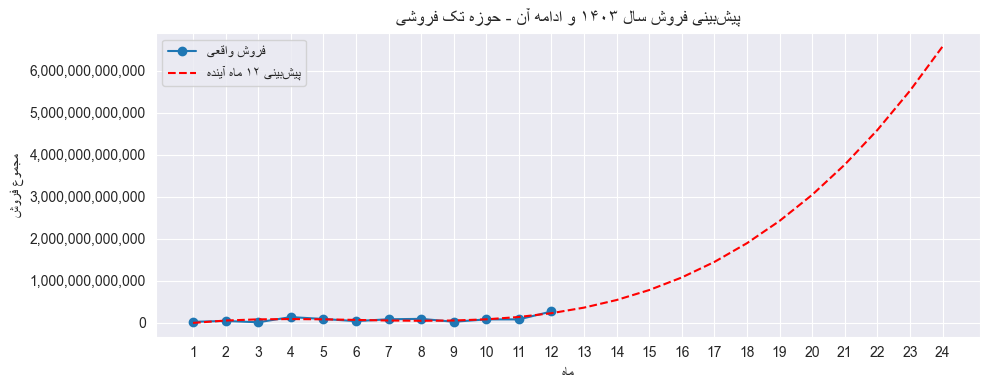


üîπ ÿ≠Ÿàÿ≤Ÿá: ÿÆÿØŸÖÿßÿ™ Ÿæÿ≥ ÿßÿ≤ ŸÅÿ±Ÿàÿ¥
MSE: 2,070,768,750,938,301,399,040
R¬≤: 0.317


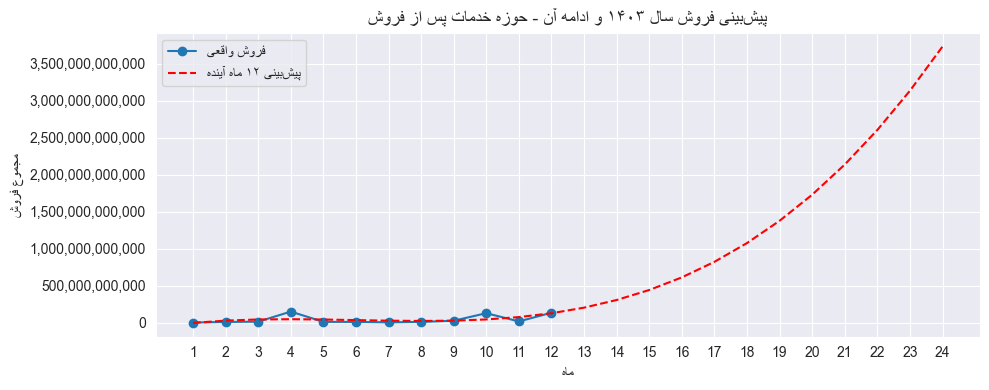


üîπ ÿ≠Ÿàÿ≤Ÿá: ŸÖŸÜÿßŸÇÿµŸá ÿß€å
MSE: 498,024,635,288,435,826,884,608
R¬≤: 0.233


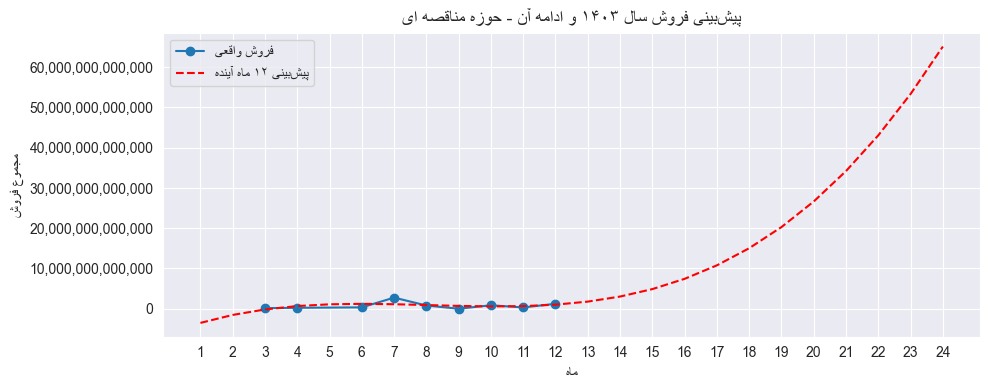


üîπ ÿ≠Ÿàÿ≤Ÿá: ŸÜŸÖÿß€åŸÜÿØ⁄ØÿßŸÜ
MSE: 95,881,889,257,018,114,048
R¬≤: 0.340


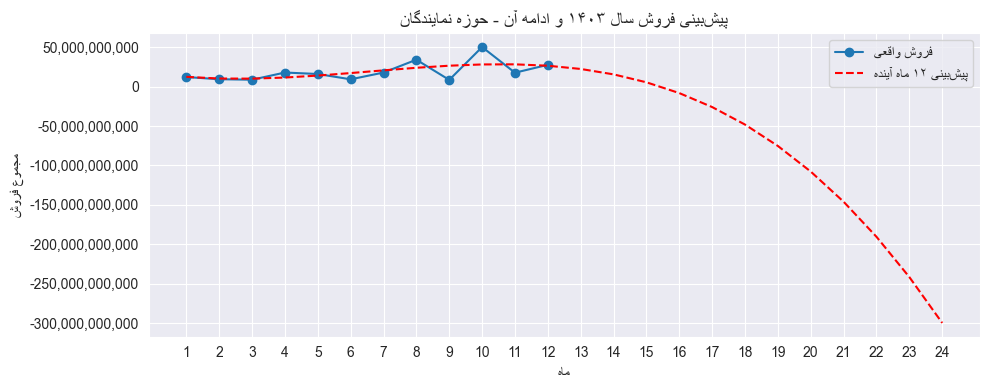

-190659765311.35498


In [213]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# ŸÅ€åŸÑÿ™ÿ± ŸÅŸÇÿ∑ ÿØÿßÿØŸá‚ÄåŸáÿß€å ÿ≥ÿßŸÑ €±€¥€∞€≥
data_1403 = grouped[grouped['Year'] == '1403']

# ŸÑ€åÿ≥ÿ™ ÿ≠Ÿàÿ≤Ÿá‚ÄåŸáÿß€å ŸÅÿ±Ÿàÿ¥
sales_areas = data_1403['SalesArea'].unique()

for area in sales_areas:
    data_area = data_1403[data_1403['SalesArea'] == area]
    
    x = data_area['Month'].values
    y = data_area['TotalSales'].values

    # ŸÖÿØŸÑ ÿ±⁄Øÿ±ÿ≥€åŸàŸÜ ⁄ÜŸÜÿØÿ¨ŸÖŸÑŸá‚Äåÿß€å ÿØÿ±ÿ¨Ÿá 3
    degree = 3
    model = np.poly1d(np.polyfit(x, y, degree))

    # Ÿæ€åÿ¥‚Äåÿ®€åŸÜ€å ÿ±Ÿà€å ÿØÿßÿØŸá‚ÄåŸáÿß€å ŸÖŸàÿ¨ŸàÿØ Ÿà 12 ŸÖÿßŸá ÿ¢€åŸÜÿØŸá
    x_future = np.arange(1, 25)  # ŸÖÿßŸá‚ÄåŸáÿß€å 1 ÿ™ÿß 24
    y_future_pred = model(x_future)

    # ÿßÿ±ÿ≤€åÿßÿ®€å ŸÖÿØŸÑ ÿ±Ÿà€å ÿØÿßÿØŸá‚ÄåŸáÿß€å ŸàÿßŸÇÿπ€å
    y_pred_train = model(x)
    mse = mean_squared_error(y, y_pred_train)
    r2 = r2_score(y, y_pred_train)

    # ÿ±ÿ≥ŸÖ ŸÜŸÖŸàÿØÿßÿ±
    plt.figure(figsize=(10, 4))
    plt.plot(x, y, 'o-', label=reshape_fa('ŸÅÿ±Ÿàÿ¥ ŸàÿßŸÇÿπ€å'))
    plt.plot(x_future, y_future_pred, 'r--', label=reshape_fa('Ÿæ€åÿ¥‚Äåÿ®€åŸÜ€å €±€≤ ŸÖÿßŸá ÿ¢€åŸÜÿØŸá'))

    plt.title(reshape_fa(f'Ÿæ€åÿ¥‚Äåÿ®€åŸÜ€å ŸÅÿ±Ÿàÿ¥ ÿ≥ÿßŸÑ €±€¥€∞€≥ Ÿà ÿßÿØÿßŸÖŸá ÿ¢ŸÜ - ÿ≠Ÿàÿ≤Ÿá {area}'), fontsize=13)
    plt.xlabel(reshape_fa('ŸÖÿßŸá'))
    plt.ylabel(reshape_fa('ŸÖÿ¨ŸÖŸàÿπ ŸÅÿ±Ÿàÿ¥'))
    plt.xticks(ticks=np.arange(1, 25, 1))
    plt.grid(True)
    plt.legend()
    plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))
    
    # ⁄ÜÿßŸæ ÿßÿ±ÿ≤€åÿßÿ®€å ŸÖÿØŸÑ
    print(f'\nüîπ ÿ≠Ÿàÿ≤Ÿá: {area}')
    print(f'MSE: {mse:,.0f}')
    print(f'R¬≤: {r2:.3f}')
    
    plt.tight_layout()
    plt.show()

